In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [112]:
data = pd.read_csv ("C:\\Users\\htc\\Downloads\\train.csv")

In [114]:
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [115]:
#First 5 rows of our dataset
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [117]:
data.shape

(1460, 81)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [119]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [145]:
data.skew()

C:\Users\htc\AppData\Local\Temp\ipykernel_17496\1188251951.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [147]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

# Missing Values

In [121]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [122]:
data.isnull().sum().sum()

6965

In [131]:
Feature_with_null = [col for col in data.columns if data[col].isnull().sum() >0]

In [136]:
Feature_with_null

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [138]:
for i in Feature_with_null:
    print (i , data[i].isnull().mean())

LotFrontage 0.1773972602739726
Alley 0.9376712328767123
MasVnrType 0.005479452054794521
MasVnrArea 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
Electrical 0.0006849315068493151
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageYrBlt 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


In [143]:
for i in Feature_with_null:
    print (i , 'has', np.round (data[i].isnull().mean(),2) ,'% Missing Value'    )

LotFrontage has 0.18 % Missing Value
Alley has 0.94 % Missing Value
MasVnrType has 0.01 % Missing Value
MasVnrArea has 0.01 % Missing Value
BsmtQual has 0.03 % Missing Value
BsmtCond has 0.03 % Missing Value
BsmtExposure has 0.03 % Missing Value
BsmtFinType1 has 0.03 % Missing Value
BsmtFinType2 has 0.03 % Missing Value
Electrical has 0.0 % Missing Value
FireplaceQu has 0.47 % Missing Value
GarageType has 0.06 % Missing Value
GarageYrBlt has 0.06 % Missing Value
GarageFinish has 0.06 % Missing Value
GarageQual has 0.06 % Missing Value
GarageCond has 0.06 % Missing Value
PoolQC has 1.0 % Missing Value
Fence has 0.81 % Missing Value
MiscFeature has 0.96 % Missing Value


In [157]:
num_of_null=list(data.isnull().sum()) #list of missing values by each feature

col_missing_value =[]
i = 0
for col in data.columns :
    ins_lst = [col , num_of_null[i]]
    col_missing_value.append(ins_lst)
    i+=1

In [161]:
col_missing_value

[['Id', 0],
 ['MSSubClass', 0],
 ['MSZoning', 0],
 ['LotFrontage', 259],
 ['LotArea', 0],
 ['Street', 0],
 ['Alley', 1369],
 ['LotShape', 0],
 ['LandContour', 0],
 ['Utilities', 0],
 ['LotConfig', 0],
 ['LandSlope', 0],
 ['Neighborhood', 0],
 ['Condition1', 0],
 ['Condition2', 0],
 ['BldgType', 0],
 ['HouseStyle', 0],
 ['OverallQual', 0],
 ['OverallCond', 0],
 ['YearBuilt', 0],
 ['YearRemodAdd', 0],
 ['RoofStyle', 0],
 ['RoofMatl', 0],
 ['Exterior1st', 0],
 ['Exterior2nd', 0],
 ['MasVnrType', 8],
 ['MasVnrArea', 8],
 ['ExterQual', 0],
 ['ExterCond', 0],
 ['Foundation', 0],
 ['BsmtQual', 37],
 ['BsmtCond', 37],
 ['BsmtExposure', 38],
 ['BsmtFinType1', 37],
 ['BsmtFinSF1', 0],
 ['BsmtFinType2', 38],
 ['BsmtFinSF2', 0],
 ['BsmtUnfSF', 0],
 ['TotalBsmtSF', 0],
 ['Heating', 0],
 ['HeatingQC', 0],
 ['CentralAir', 0],
 ['Electrical', 1],
 ['1stFlrSF', 0],
 ['2ndFlrSF', 0],
 ['LowQualFinSF', 0],
 ['GrLivArea', 0],
 ['BsmtFullBath', 0],
 ['BsmtHalfBath', 0],
 ['FullBath', 0],
 ['HalfBath', 0],


In [159]:
miss_data_frame = pd.DataFrame(data= col_missing_value ,columns = ['Name' , 'Missing Value'])

In [160]:
miss_data_frame

Name  Missing Value
0              Id              0
1      MSSubClass              0
2        MSZoning              0
3     LotFrontage            259
4         LotArea              0
..            ...            ...
76         MoSold              0
77         YrSold              0
78       SaleType              0
79  SaleCondition              0
80      SalePrice              0

[81 rows x 2 columns]

In [162]:
miss_data_frame[miss_data_frame['Missing Value']>0].sort_values(by='Missing Value',
                                                 ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')

In [166]:
import plotly.express as px
fig = px.bar(miss_data_frame.sort_values(by='Missing Value'),x='Missing Value',y='Name',
             orientation='h',height=1500,width=900,color='Missing Value',text='Missing Value',title='Missing values in train dataset')
fig.update_traces(textposition='outside')
fig.show()

# Numerical Variables

In [192]:
numerical_feature = [cols for cols  in data.columns if data.dtypes[cols] != 'O']

In [193]:
data[numerical_feature]

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       196.0         706  ...           0   
1          1976          1976         0.0         978  ...         298   
2          2001          2002       162.0         486  ...           0   
3          1915          1970         0.0         216  ...           0   
4          2000          2000       350.0         655  ...         192   
...         ...           ...         ...         ...  ...         ...   
1455       1999          2000         0.0           0  ...           0   
1456       1978          1988       119.0         790  ...         349   
1457       1941          2006         0.0         275  ...           0   
1458       1950          1996         0.0          49  ...         366   
1459       1965          1965         0.0         830  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008     208500  
1          5    2007     181500  
2          9    2008     223500  
3          2    2006     140000  
4         12    2008     250000  
...      ...     ...        ...  
1455       8    2007     175000  
1456       2    2010     210000  
1457       5    2010     266500  
1458       4    2010     142125  
1459       6    2008     147500  

[1460 rows x 38 columns]

# Datetime Variables

In [194]:
Datetime_feature = [cols for cols in numerical_feature if 'Yr' in cols or 'Year' in cols ]

In [195]:
data[Datetime_feature]

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0          2003          2003       2003.0    2008
1          1976          1976       1976.0    2007
2          2001          2002       2001.0    2008
3          1915          1970       1998.0    2006
4          2000          2000       2000.0    2008
...         ...           ...          ...     ...
1455       1999          2000       1999.0    2007
1456       1978          1988       1978.0    2010
1457       1941          2006       1941.0    2010
1458       1950          1996       1950.0    2010
1459       1965          1965       1965.0    2008

[1460 rows x 4 columns]

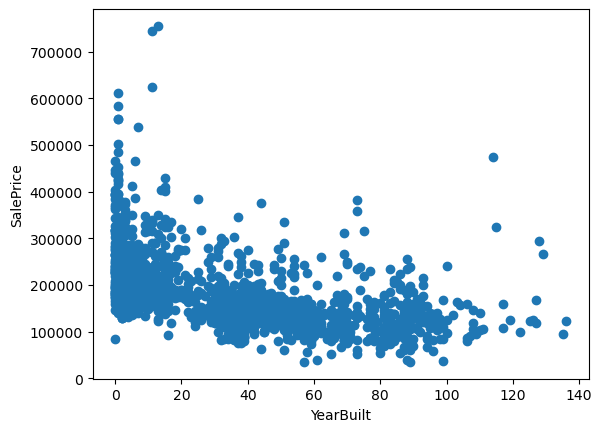

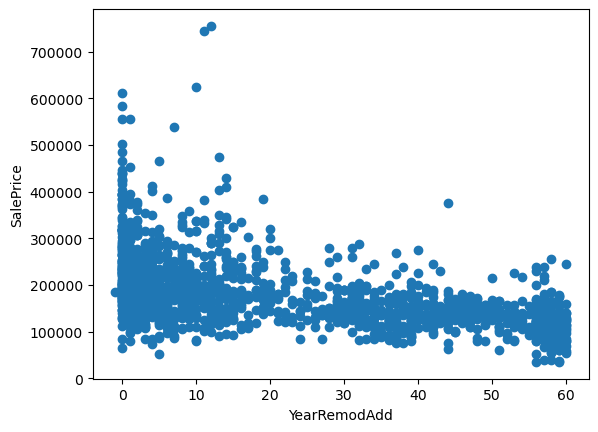

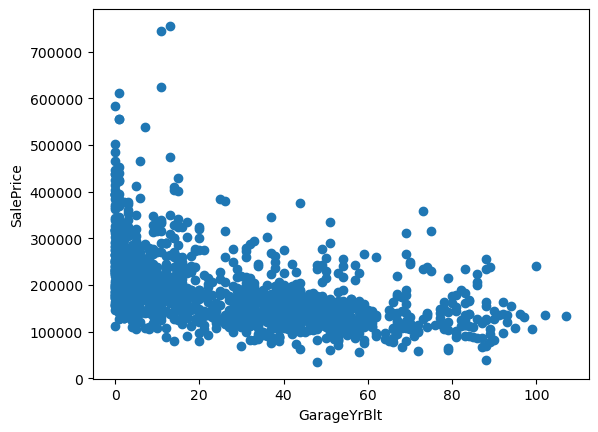

In [196]:
for feature in Datetime_feature:
    if feature!='YrSold':
        dataa=data.copy()
        dataa[feature]=dataa['YrSold']-dataa[feature]

        plt.scatter(dataa[feature],dataa['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show() 

In [197]:
discrete_feature = [feature for feature in numerical_feature if len(data[feature].unique())<15 and feature not in Datetime_feature+['Id']]
# print("Discrete Variables Count: {}".format(len(discrete_feature)))

In [198]:
data[discrete_feature]

OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  \
0               7            5             1             0         2   
1               6            8             0             1         2   
2               7            5             1             0         2   
3               7            5             1             0         1   
4               8            5             1             0         2   
...           ...          ...           ...           ...       ...   
1455            6            5             0             0         2   
1456            6            6             1             0         2   
1457            7            9             0             0         2   
1458            5            6             1             0         1   
1459            5            6             1             0         1   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0            1             3             1             8           0   
1            0             3             1             6           1   
2            1             3             1             6           1   
3            0             3             1             7           1   
4            1             4             1             9           1   
...        ...           ...           ...           ...         ...   
1455         1             3             1             7           1   
1456         0             3             1             7           2   
1457         0             4             1             9           2   
1458         0             2             1             5           0   
1459         1             3             1             6           0   

      GarageCars  PoolArea  MoSold  
0              2         0       2  
1              2         0       5  
2              2         0       9  
3              3         0       2  
4              3         0      12  
...          ...       ...     ...  
1455           2         0       8  
1456           2         0       2  
1457           1         0       5  
1458           1         0       4  
1459           1         0       6  

[1460 rows x 13 columns]

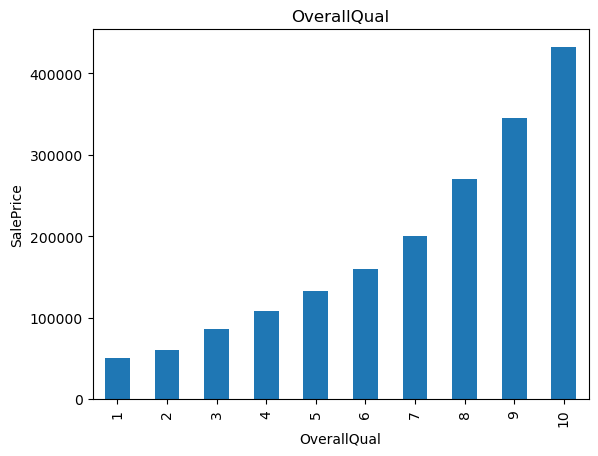

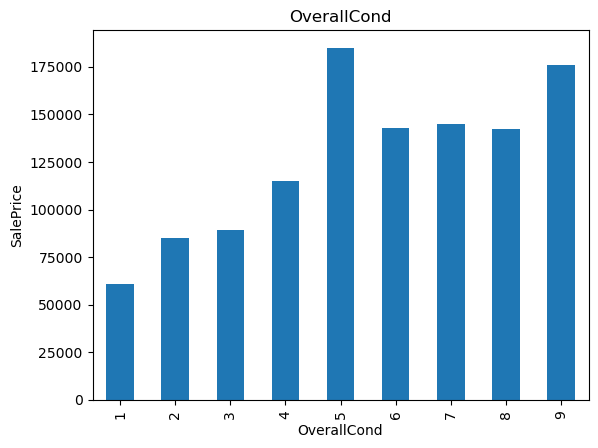

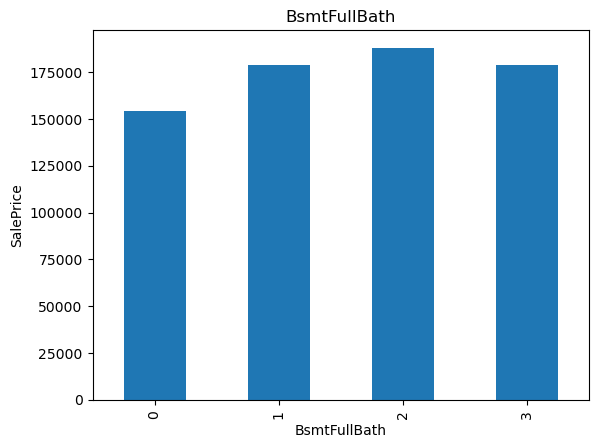

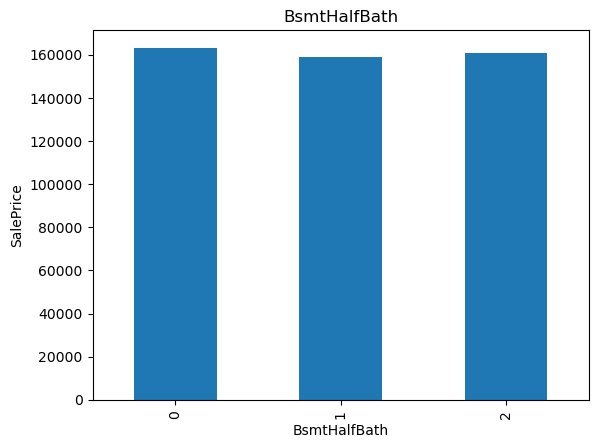

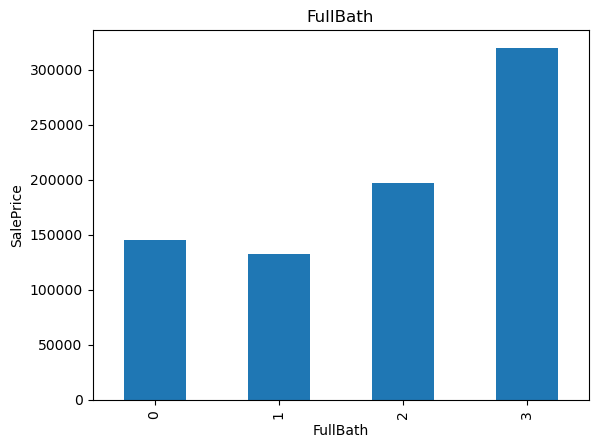

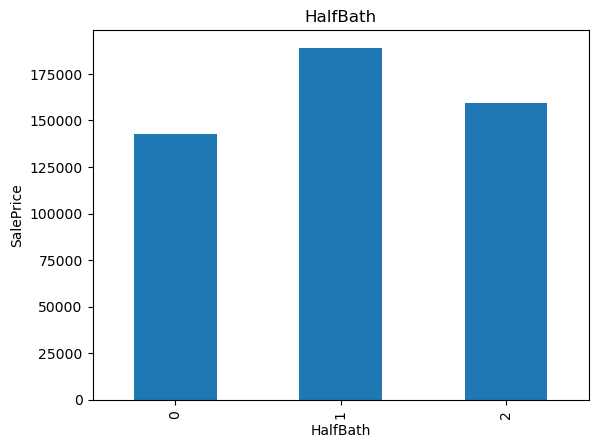

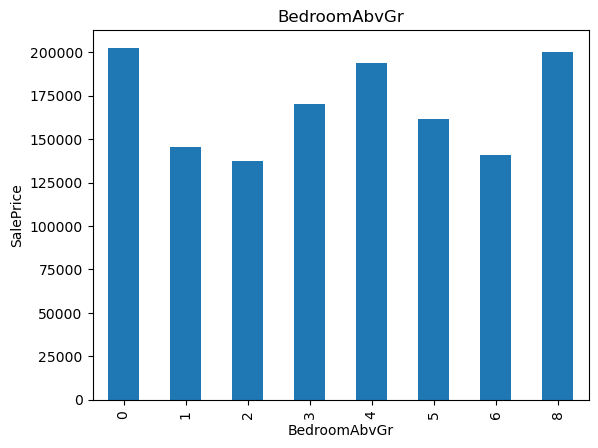

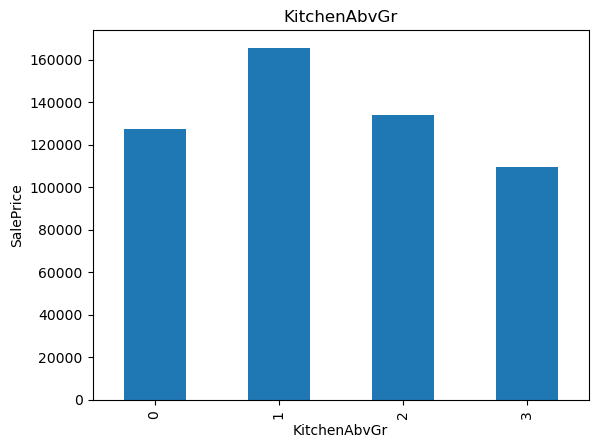

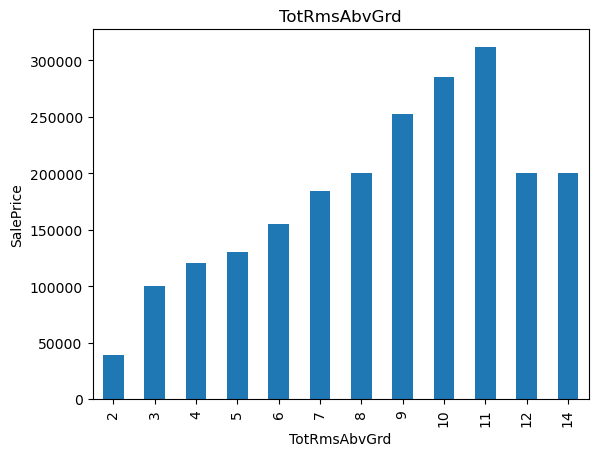

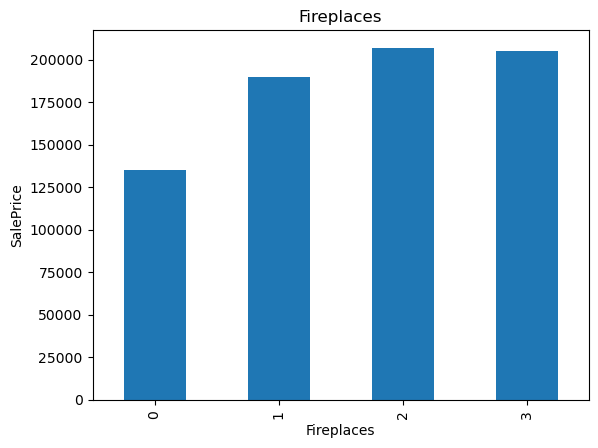

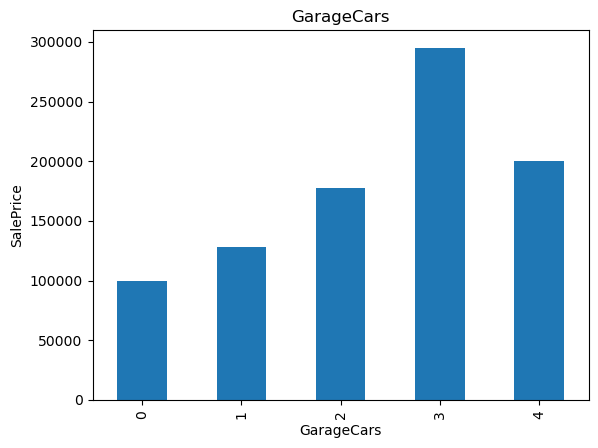

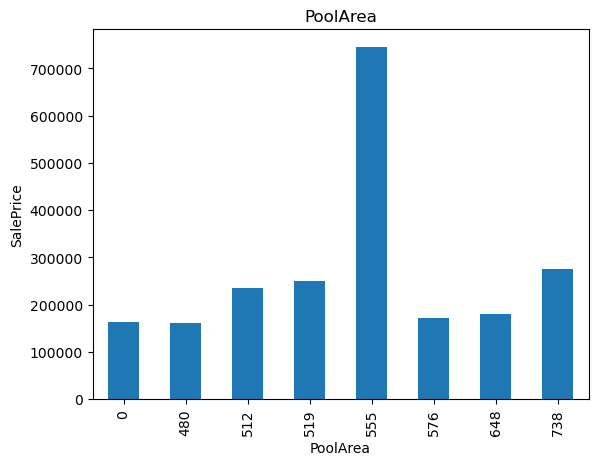

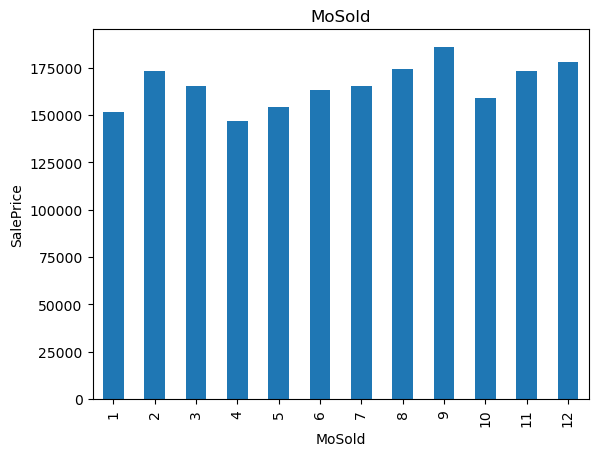

In [203]:
for feature in discrete_feature :
    dataa = data.copy()
    dataa.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [204]:
continuous_feature=[feature for feature in numerical_feature if feature not in discrete_feature+Datetime_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 20


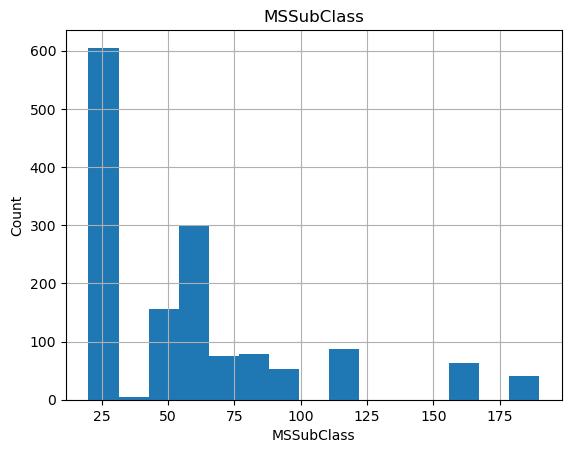

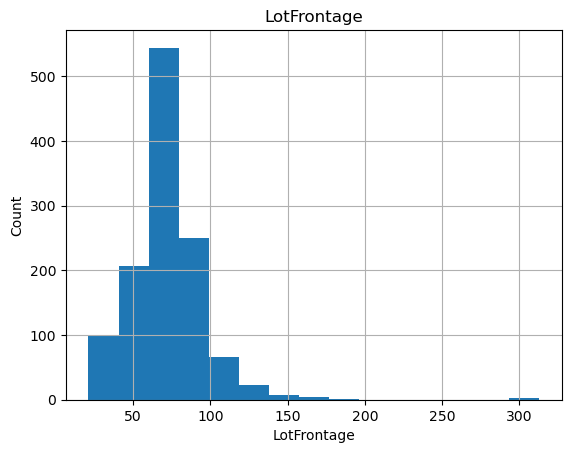

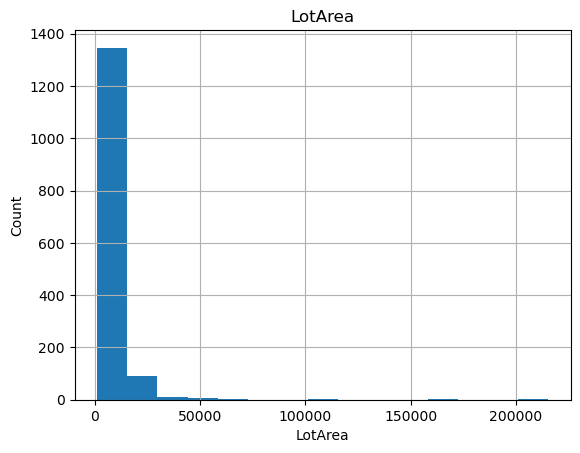

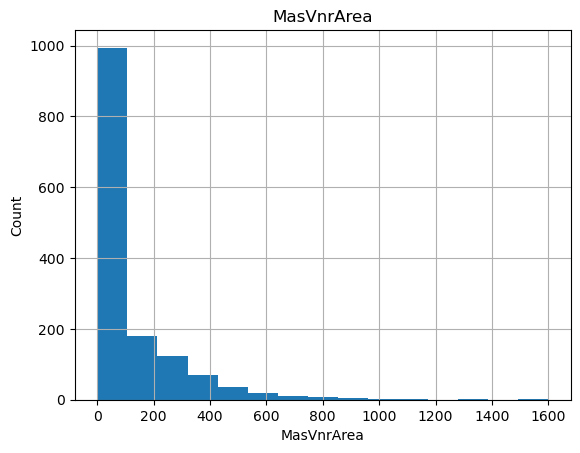

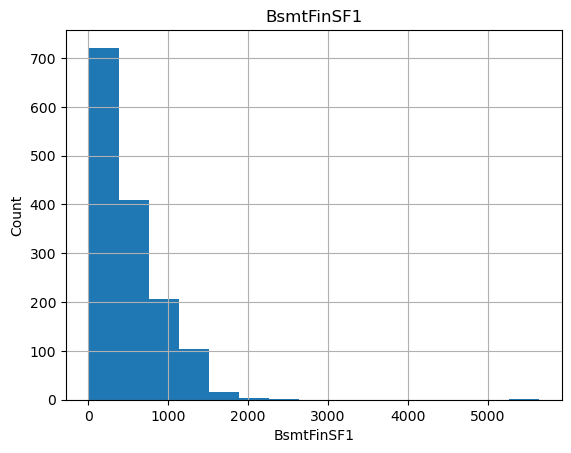

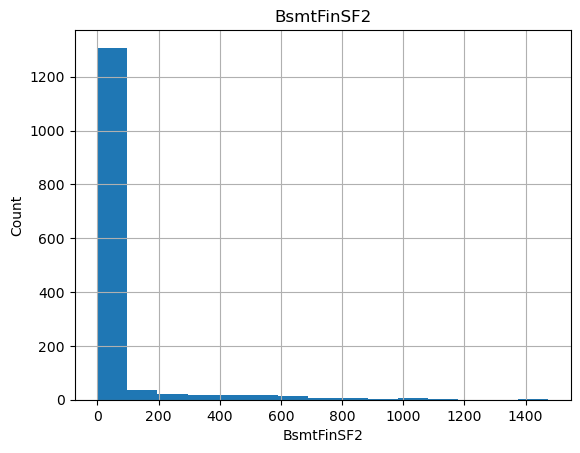

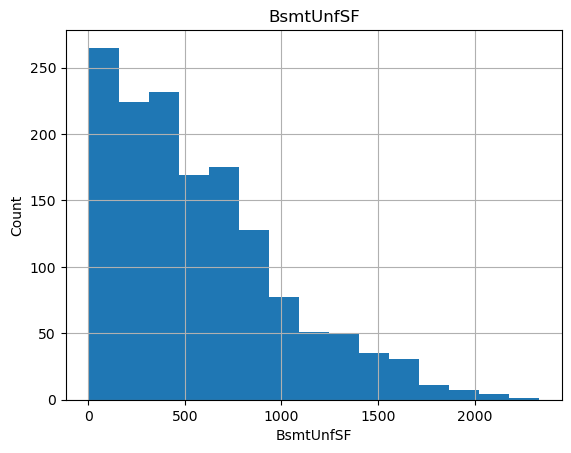

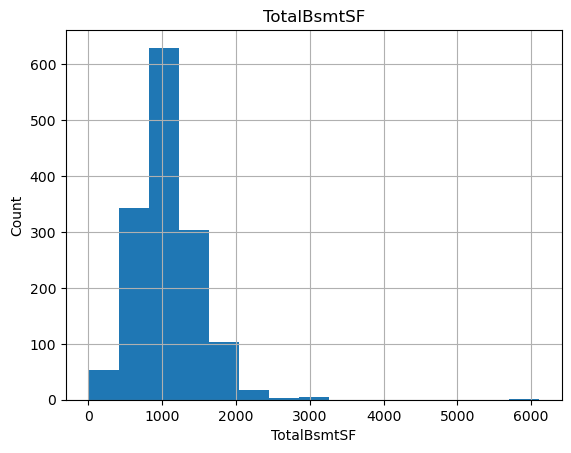

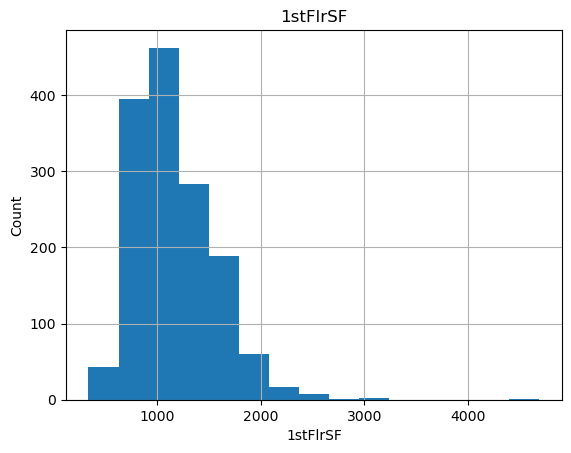

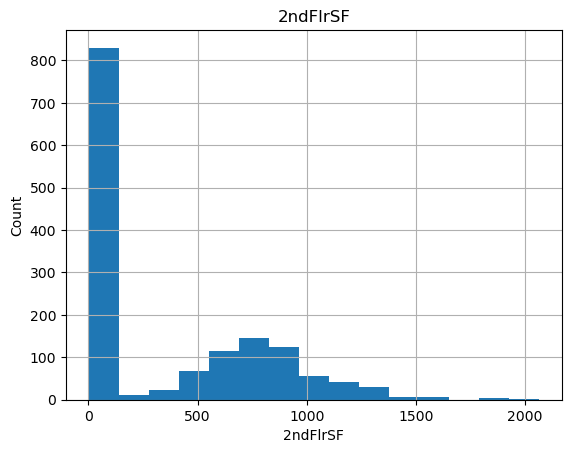

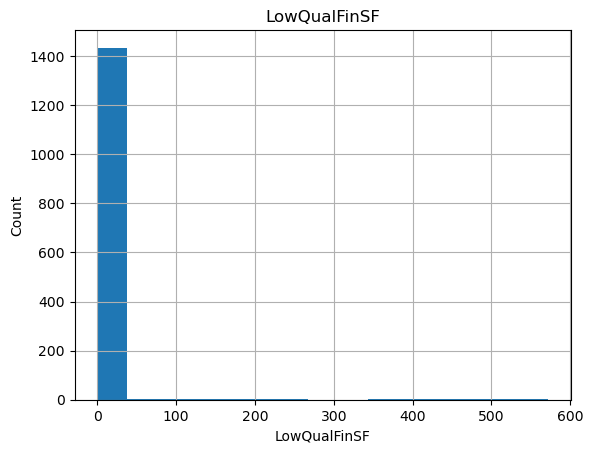

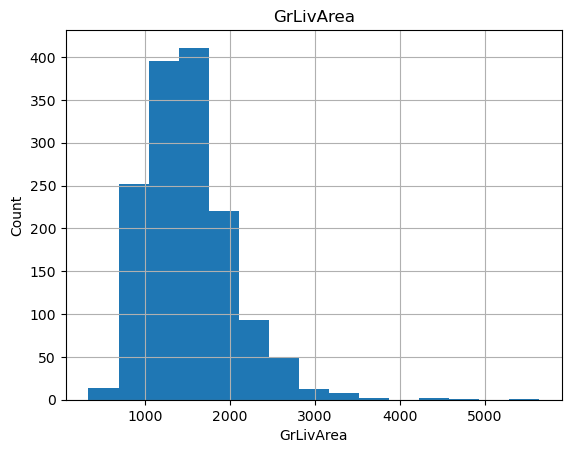

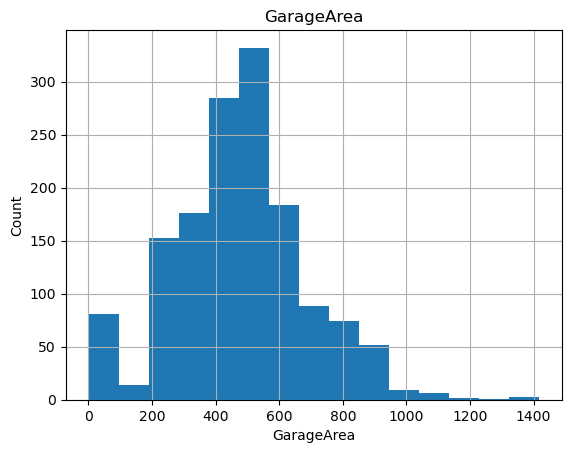

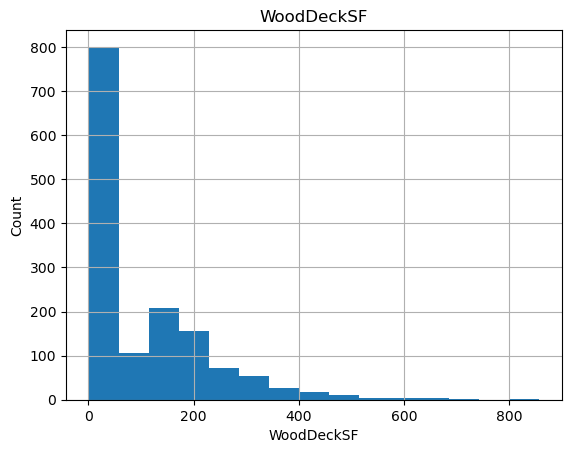

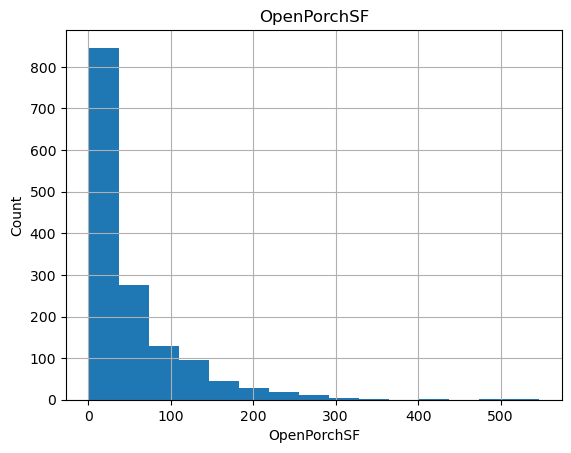

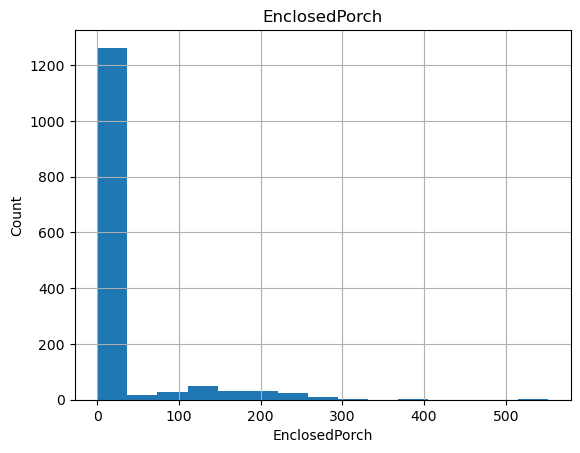

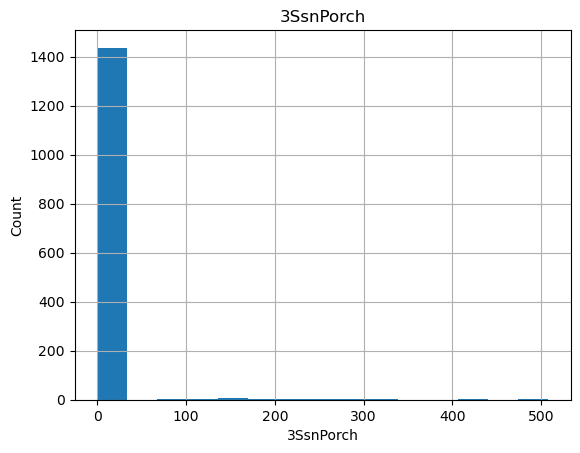

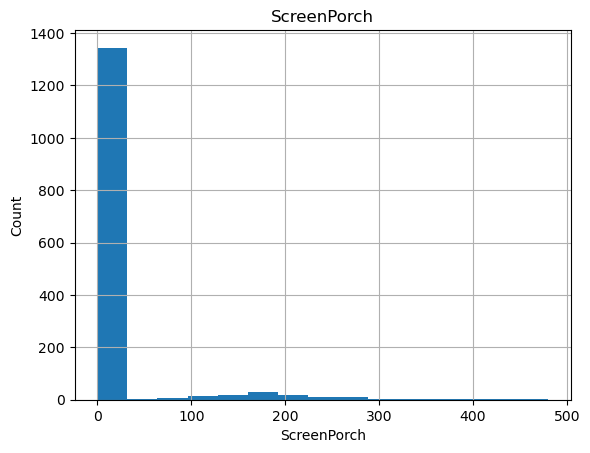

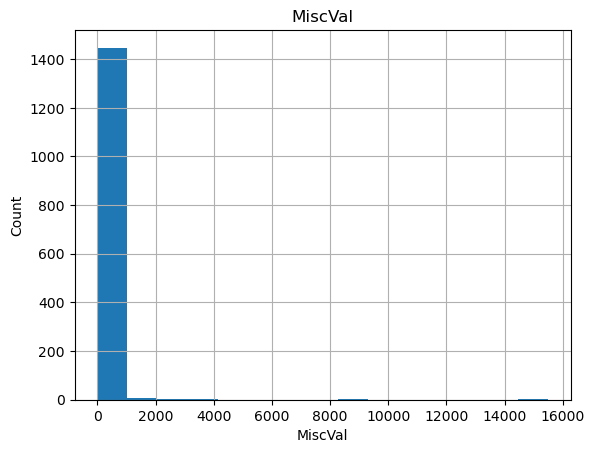

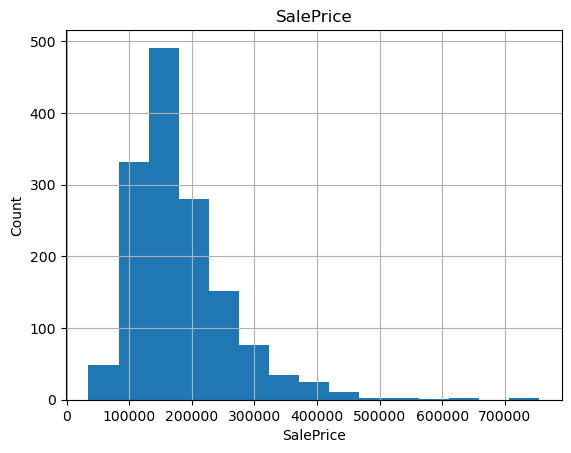

In [205]:
for feature in continuous_feature:
    dataa=data.copy()
    dataa[feature].hist(bins=15)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

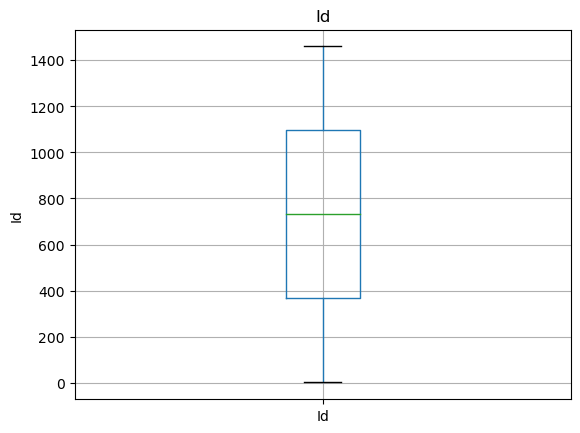

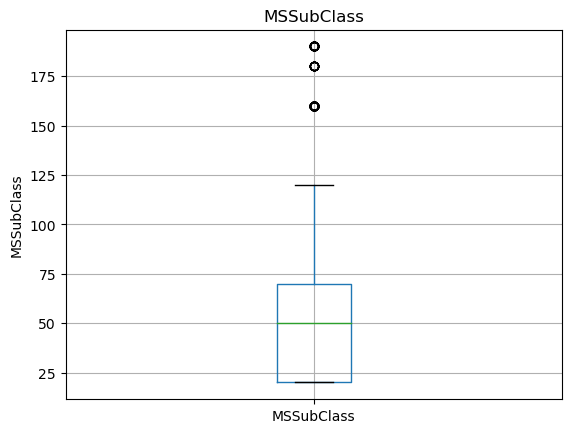

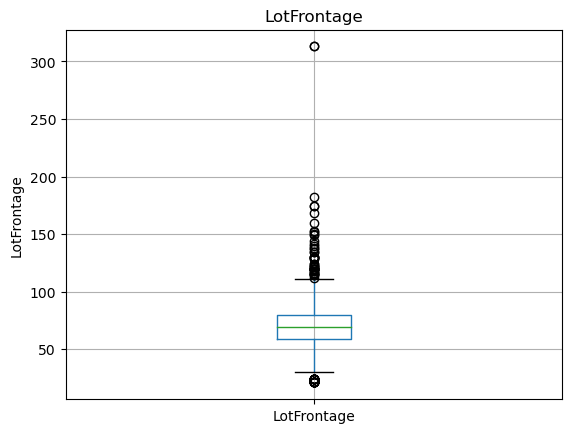

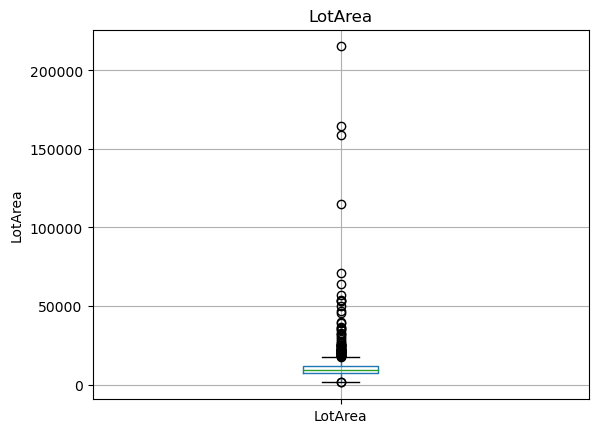

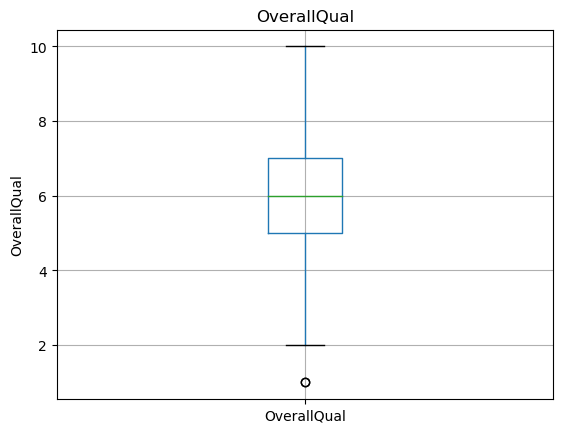

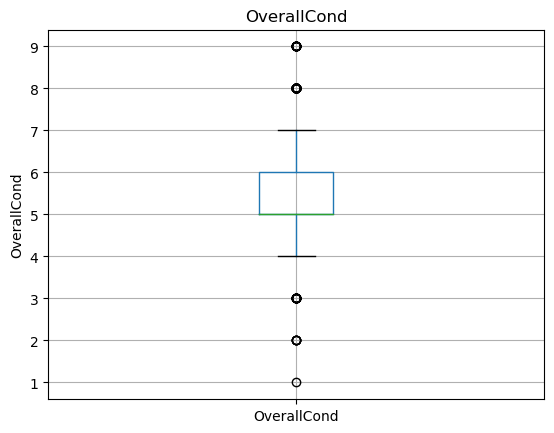

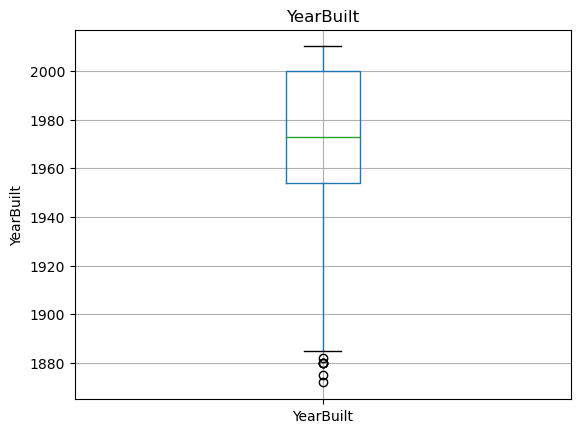

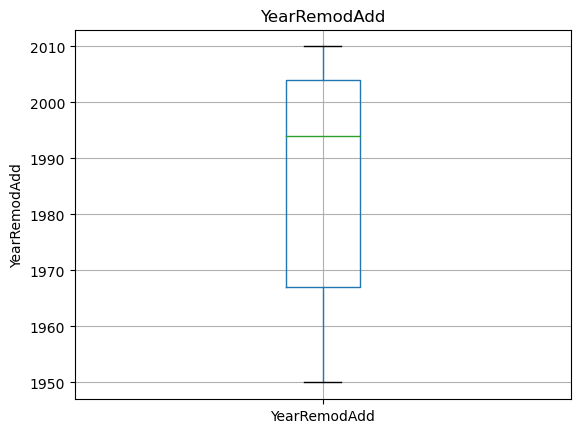

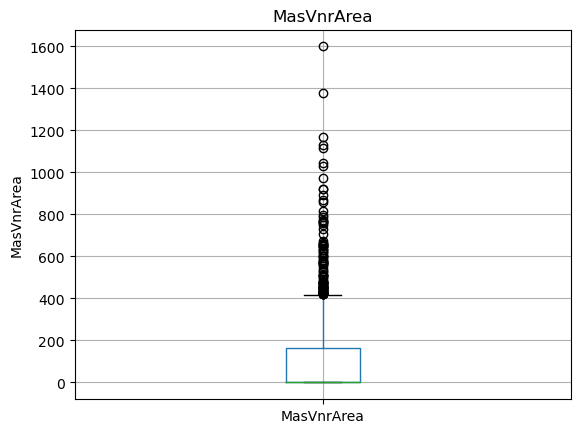

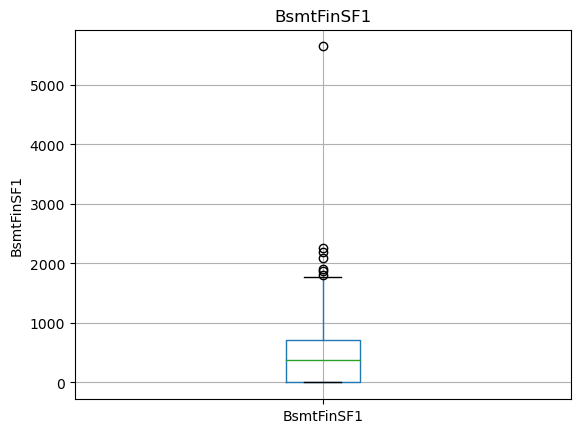

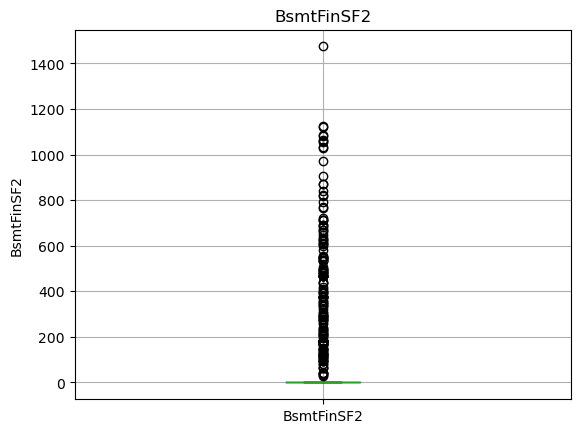

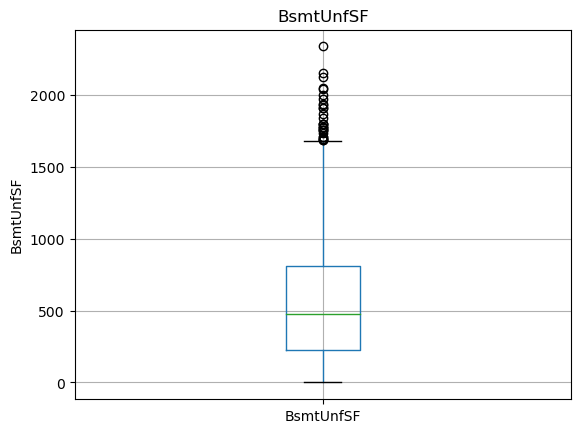

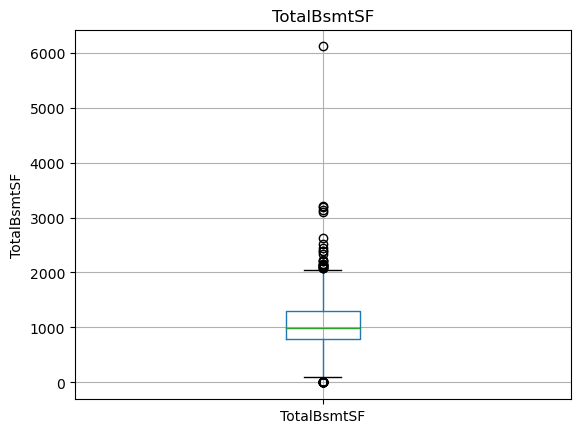

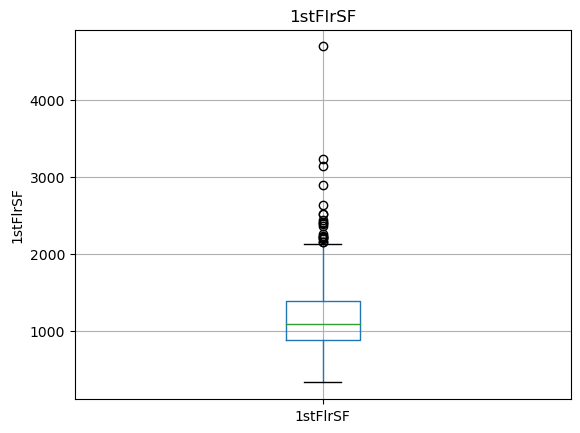

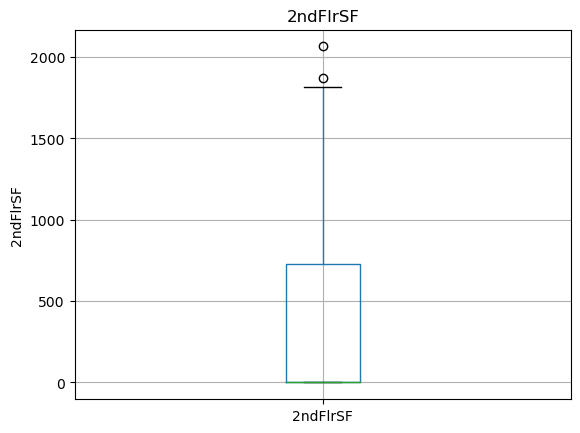

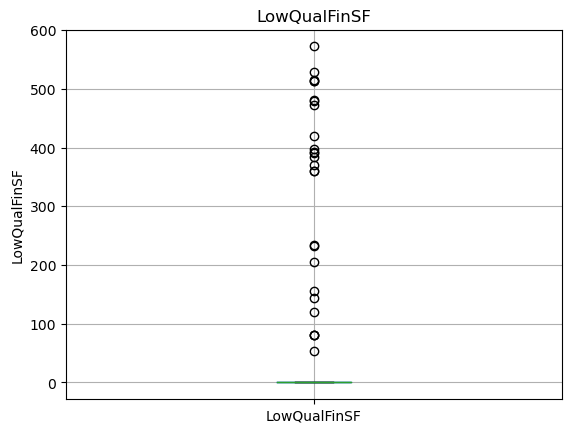

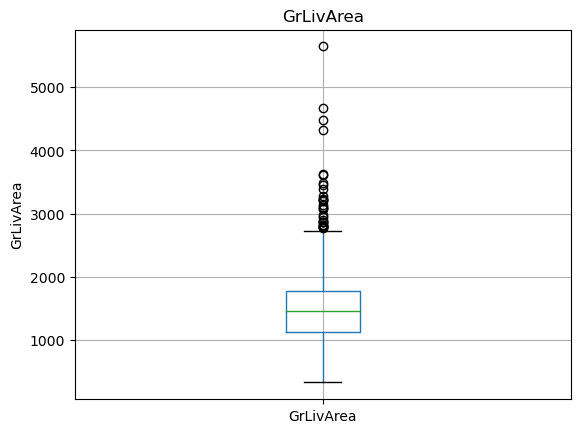

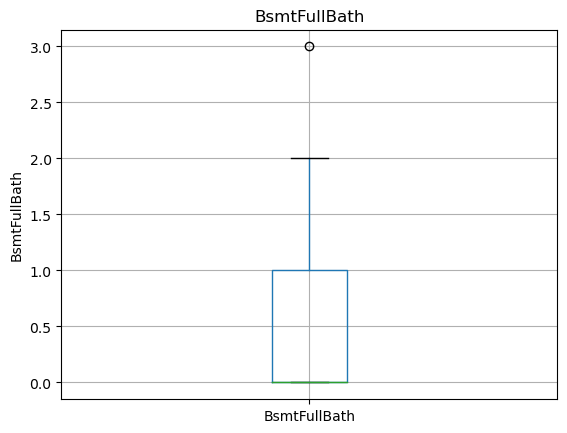

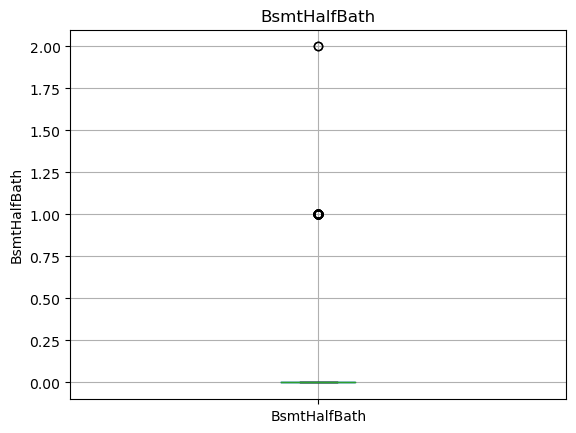

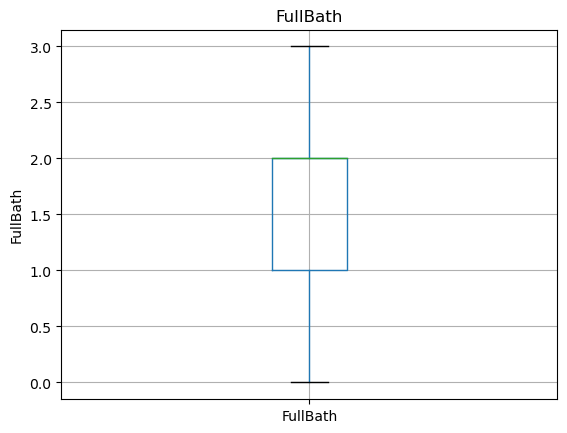

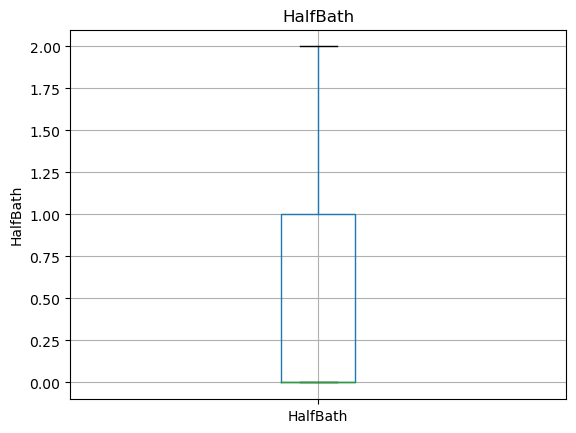

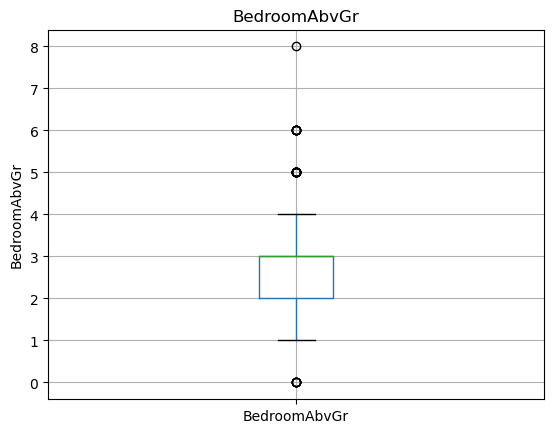

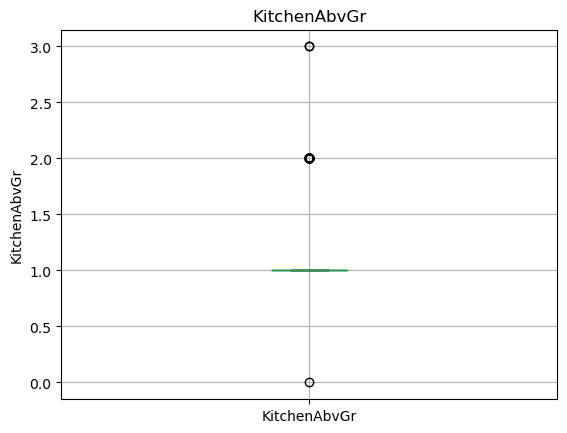

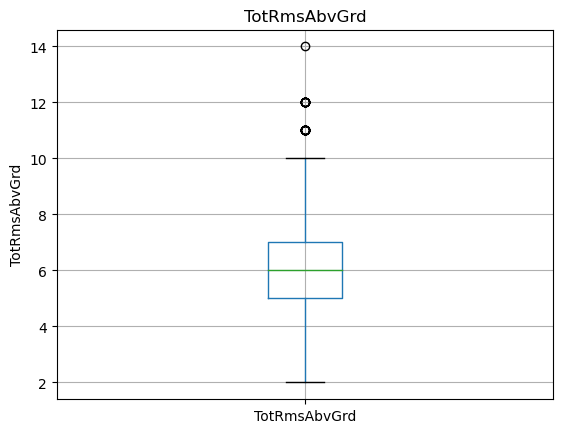

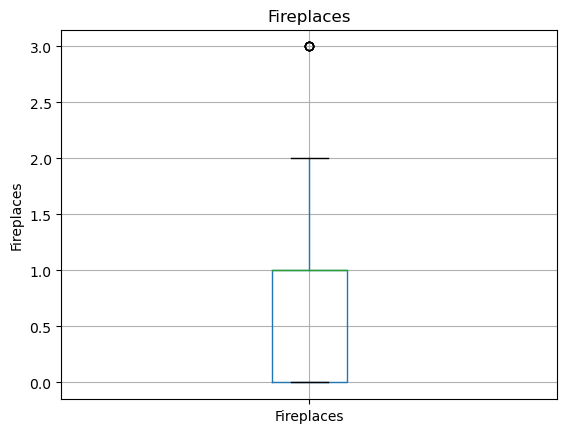

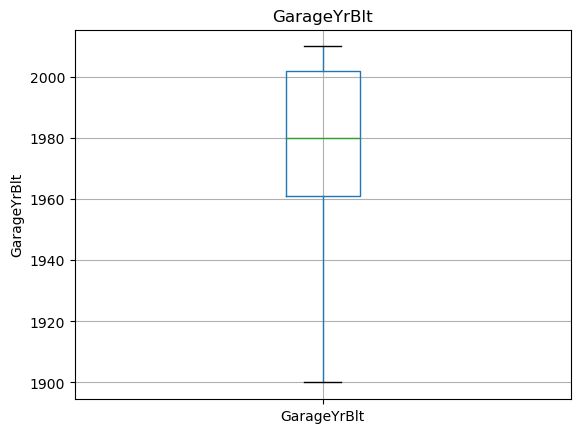

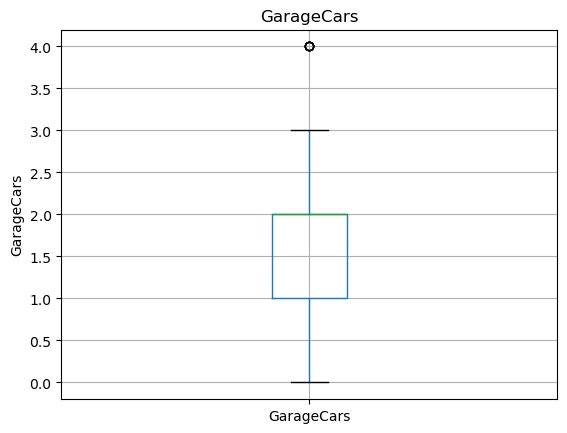

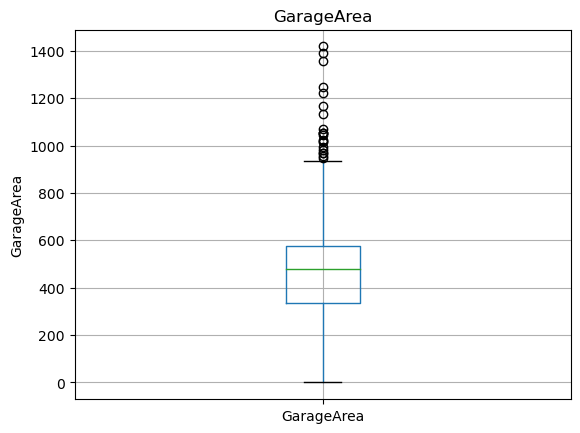

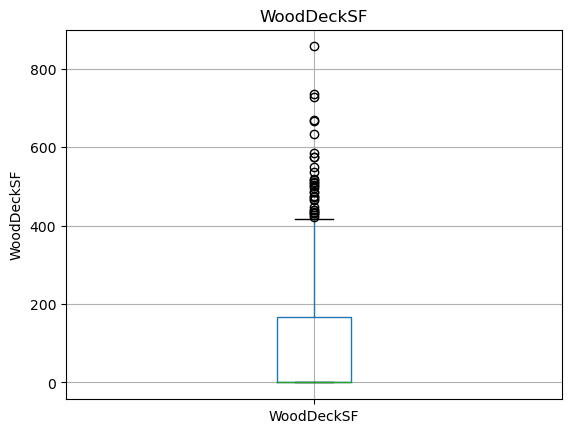

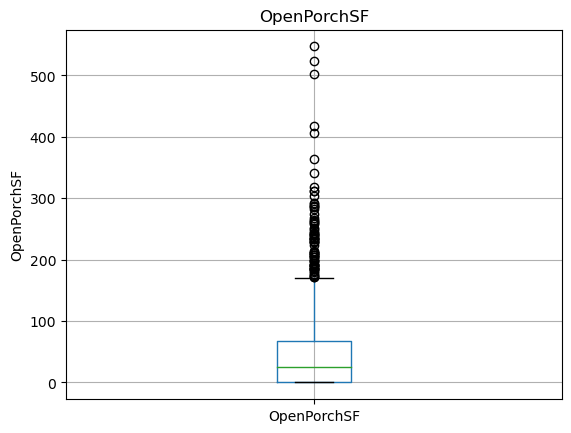

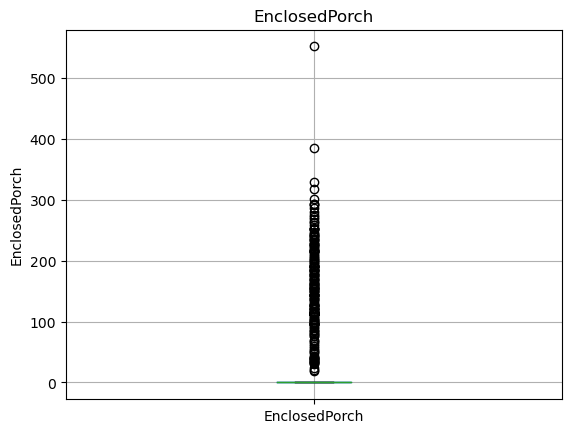

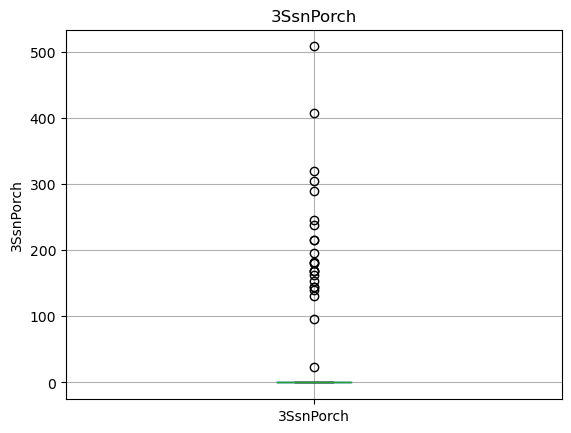

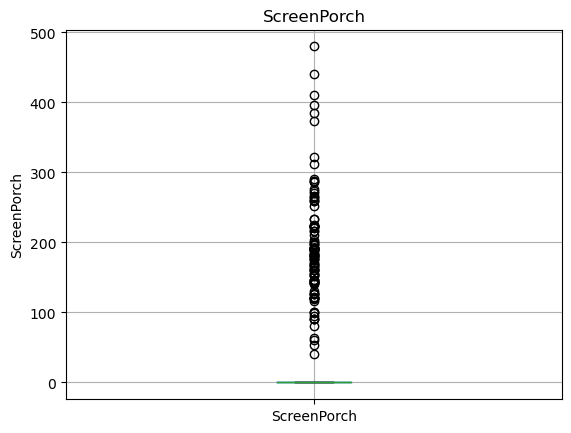

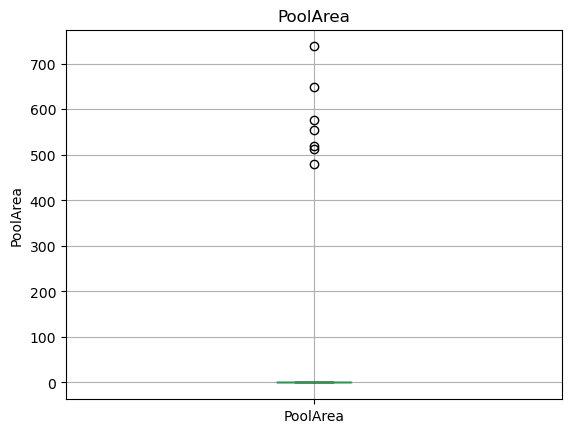

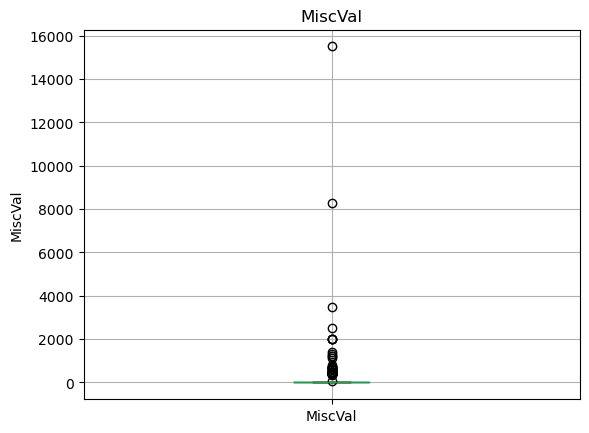

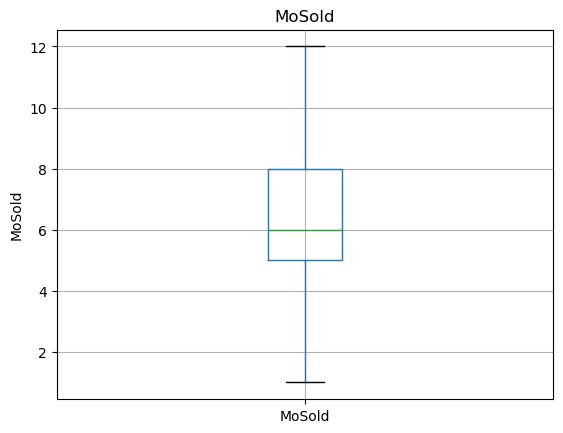

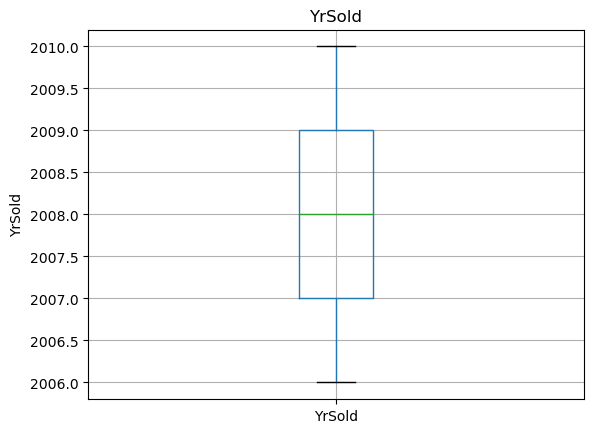

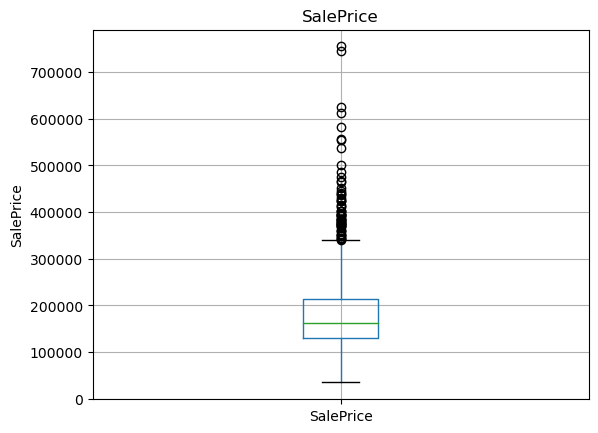

In [207]:
for feature in numerical_feature:
    dataa=data.copy()
    dataa.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

# Categorical Variables

In [208]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [209]:
data[categorical_features]

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1  ... GarageType GarageFinish GarageQual  \
0         CollgCr       Norm  ...     Attchd          RFn         TA   
1         Veenker      Feedr  ...     Attchd          RFn         TA   
2         CollgCr       Norm  ...     Attchd          RFn         TA   
3         Crawfor       Norm  ...     Detchd          Unf         TA   
4         NoRidge       Norm  ...     Attchd          RFn         TA   
...           ...        ...  ...        ...          ...        ...   
1455      Gilbert       Norm  ...     Attchd          RFn         TA   
1456       NWAmes       Norm  ...     Attchd          Unf         TA   
1457      Crawfor       Norm  ...     Attchd          RFn         TA   
1458        NAmes       Norm  ...     Attchd          Unf         TA   
1459      Edwards       Norm  ...     Attchd          Fin         TA   

     GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0            TA          Y    NaN    NaN         NaN       WD        Normal  
1            TA          Y    NaN    NaN         NaN       WD        Normal  
2            TA          Y    NaN    NaN         NaN       WD        Normal  
3            TA          Y    NaN    NaN         NaN       WD       Abnorml  
4            TA          Y    NaN    NaN         NaN       WD        Normal  
...         ...        ...    ...    ...         ...      ...           ...  
1455         TA          Y    NaN    NaN         NaN       WD        Normal  
1456         TA          Y    NaN  MnPrv         NaN       WD        Normal  
1457         TA          Y    NaN  GdPrv        Shed       WD        Normal  
1458         TA          Y    NaN    NaN         NaN       WD        Normal  
1459         TA          Y    NaN    NaN         NaN       WD        Normal  

[1460 rows x 43 columns]

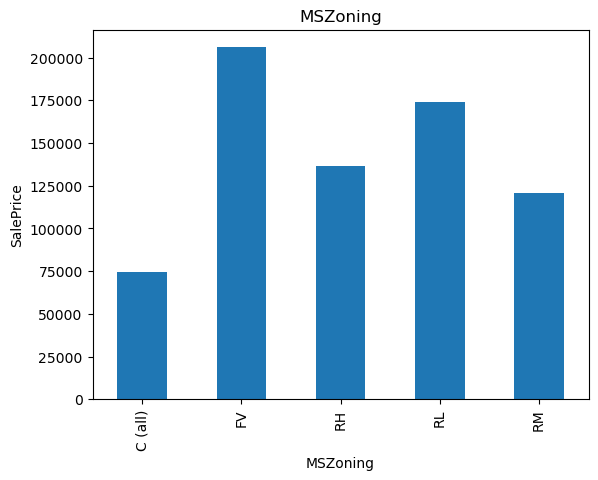

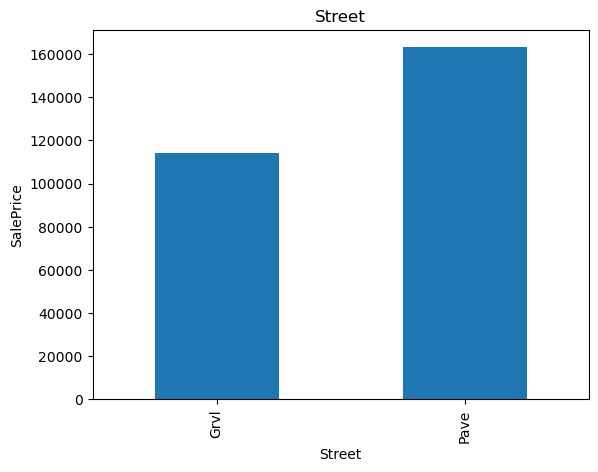

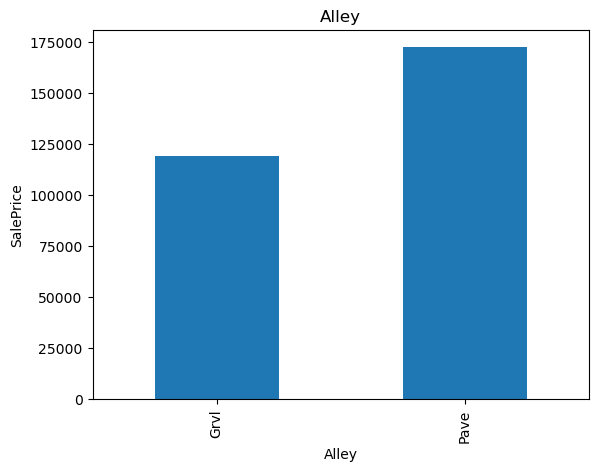

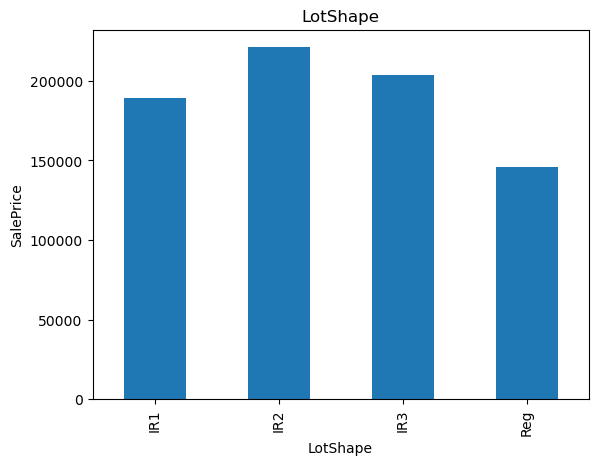

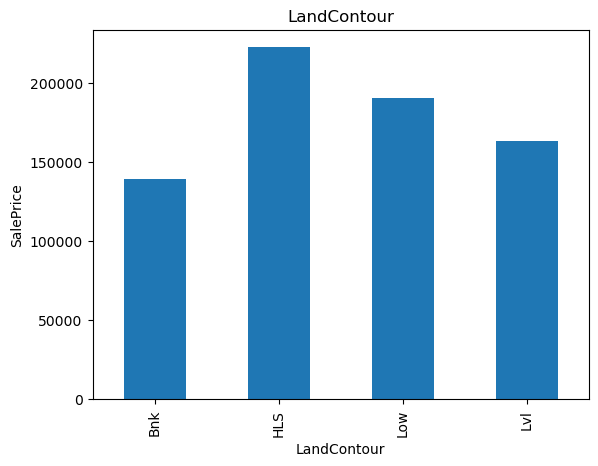

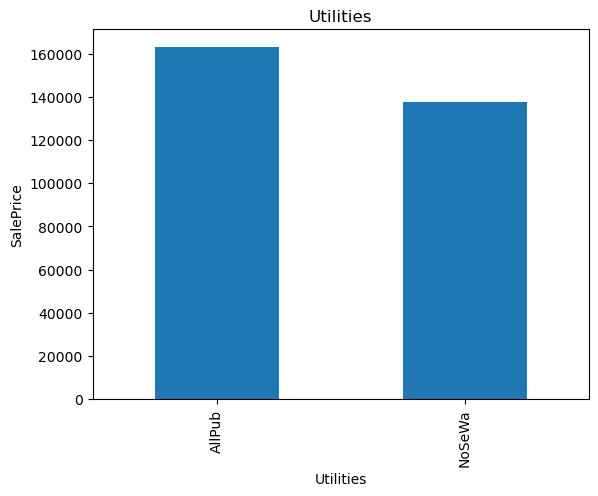

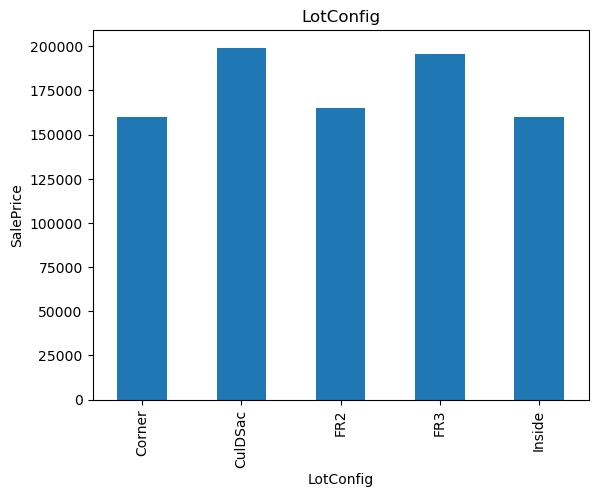

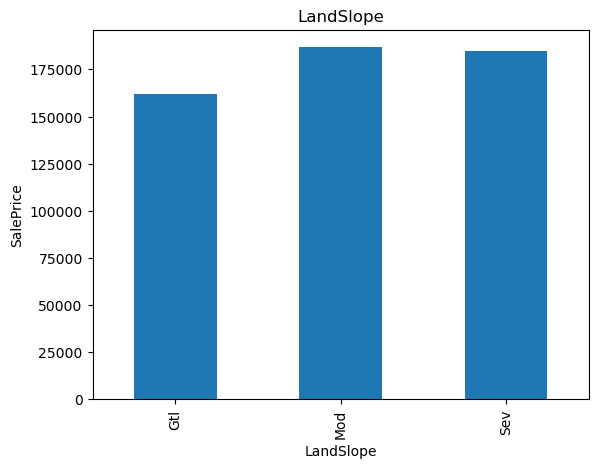

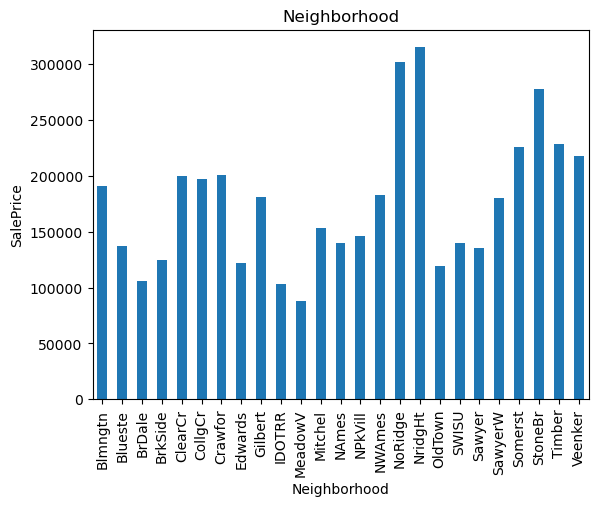

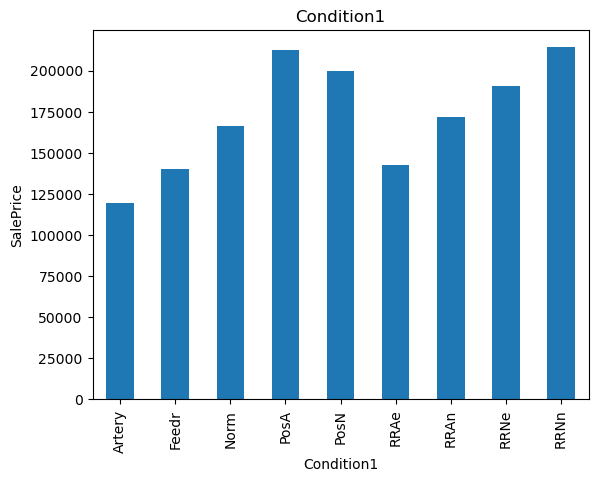

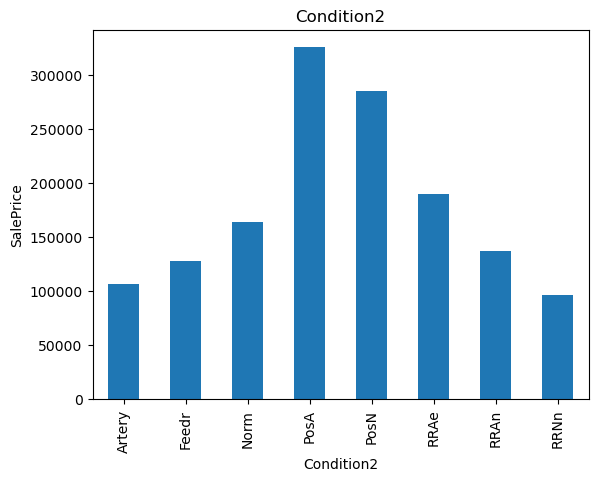

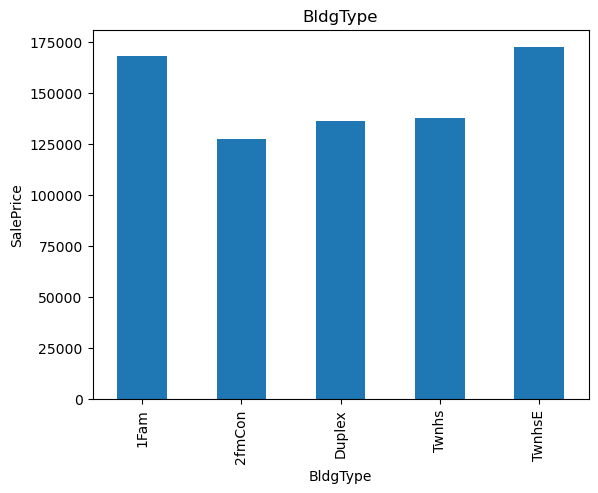

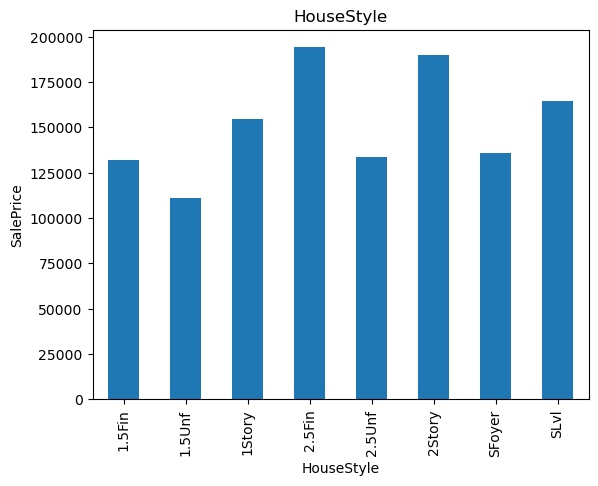

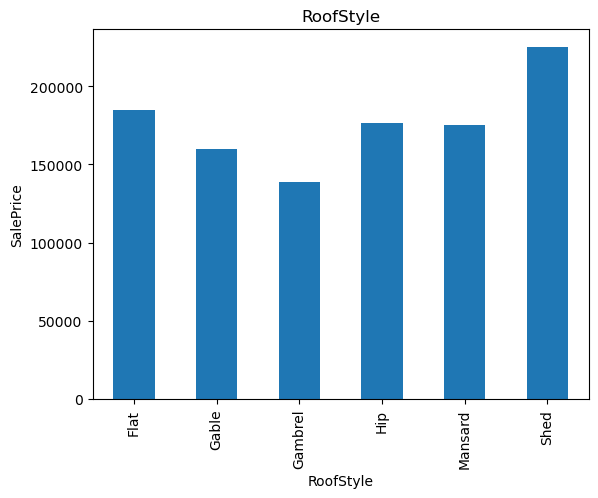

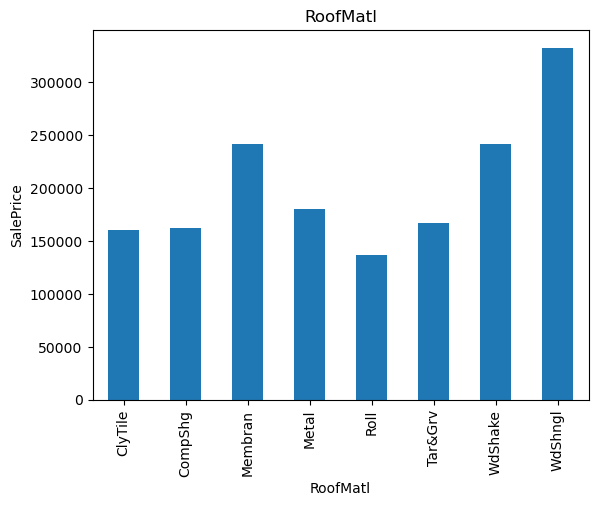

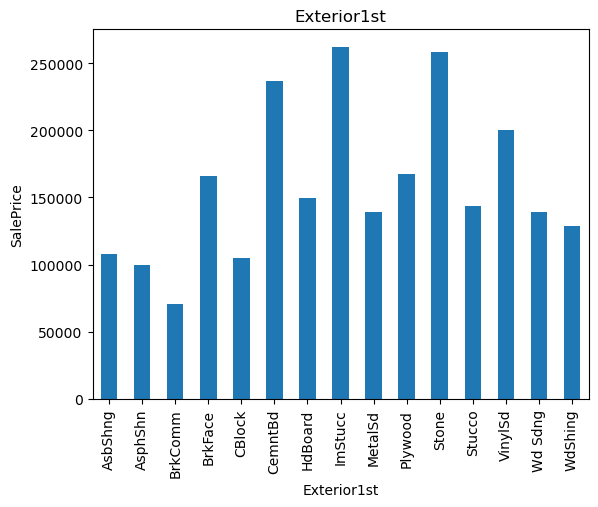

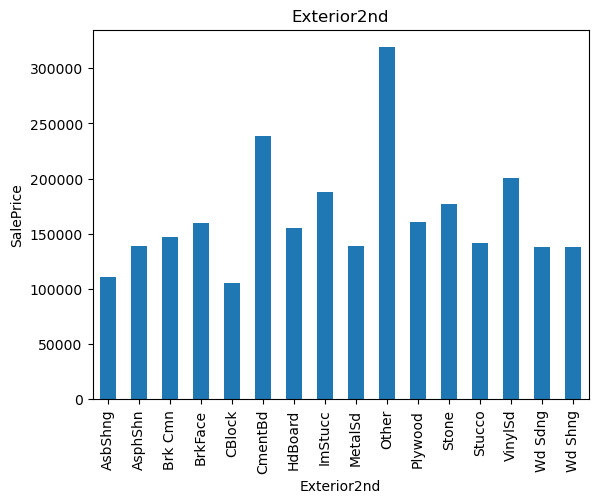

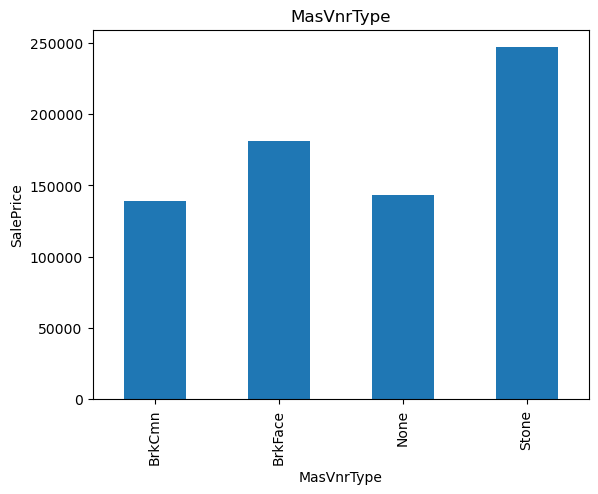

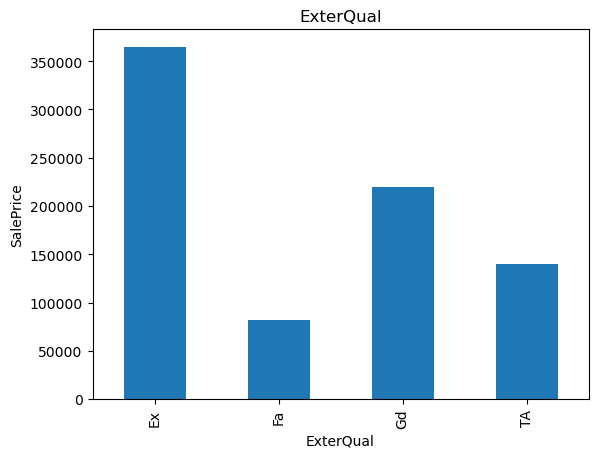

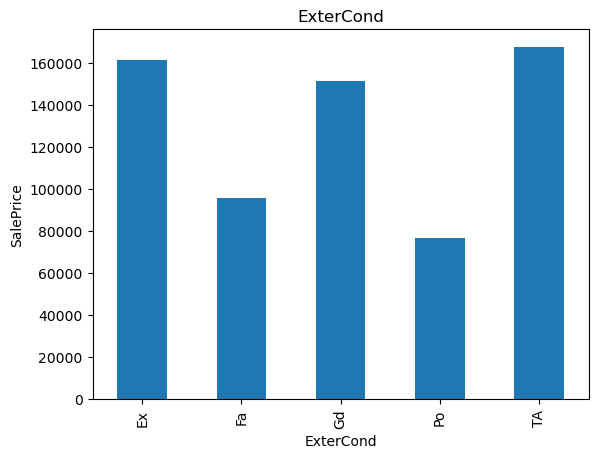

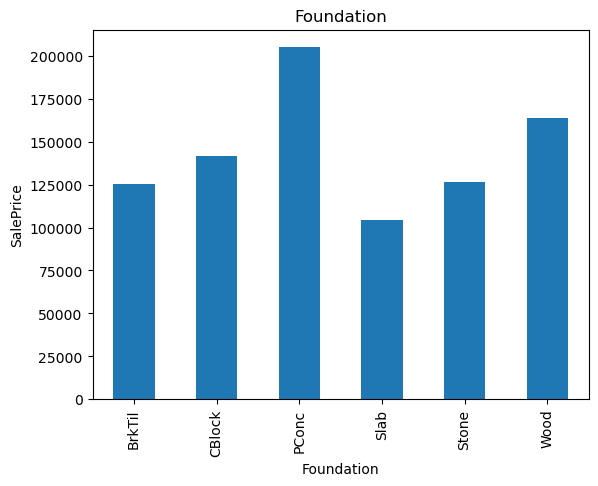

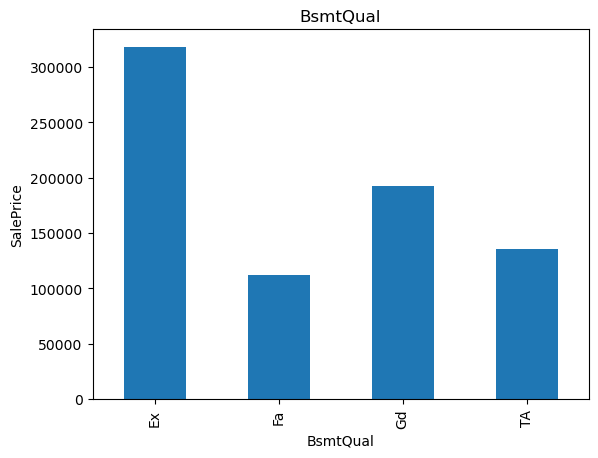

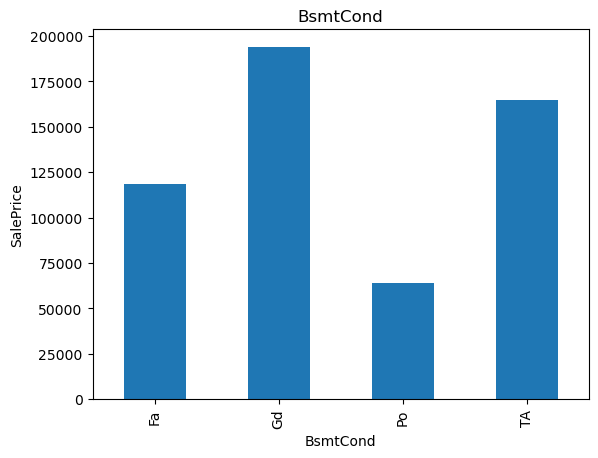

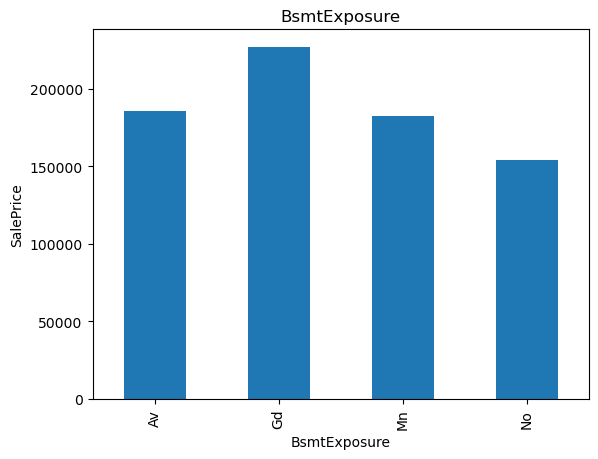

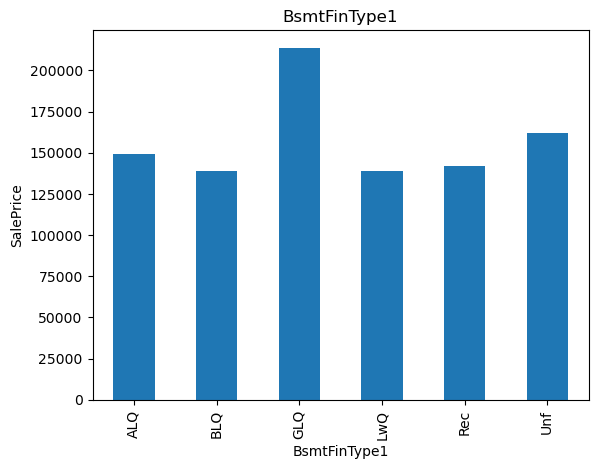

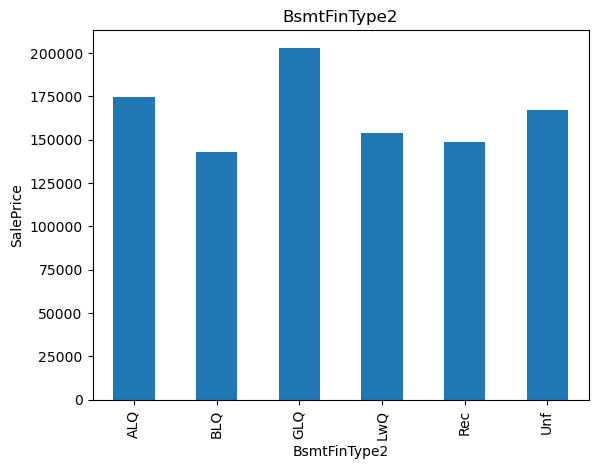

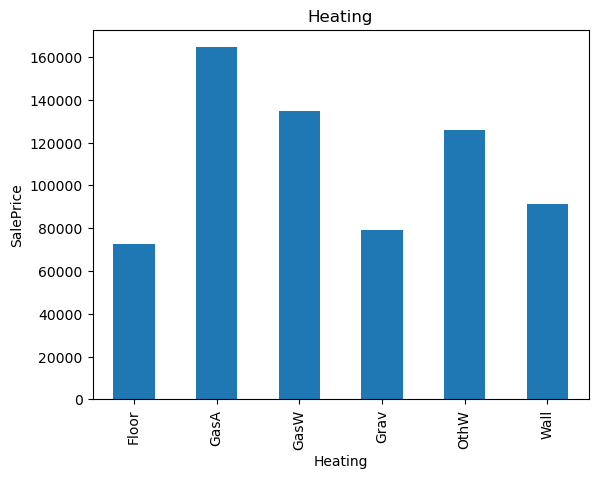

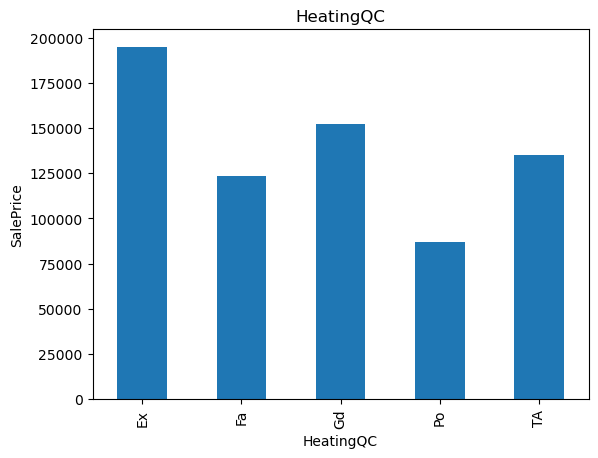

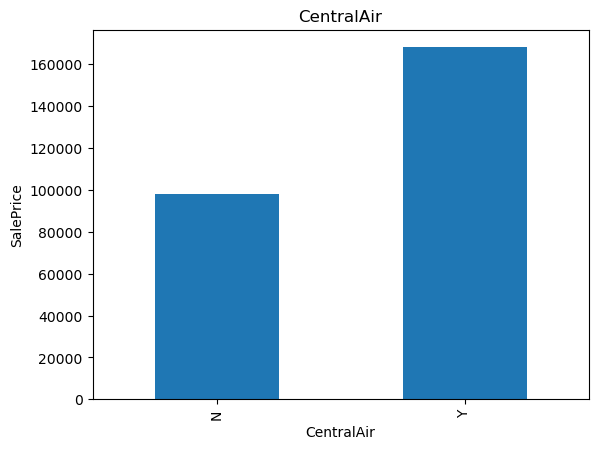

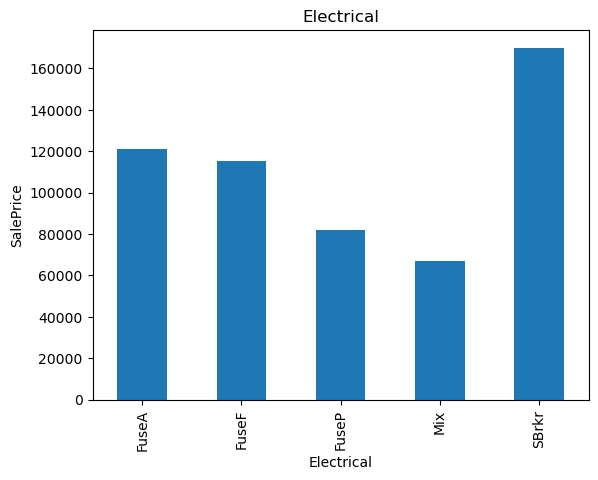

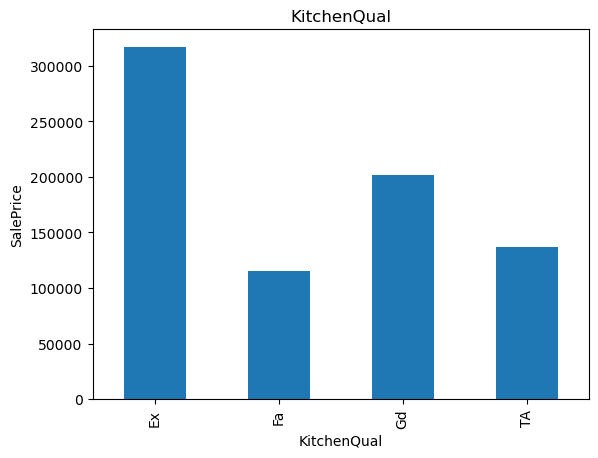

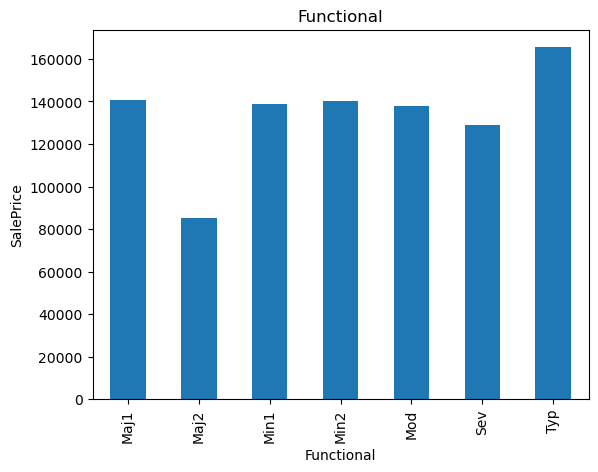

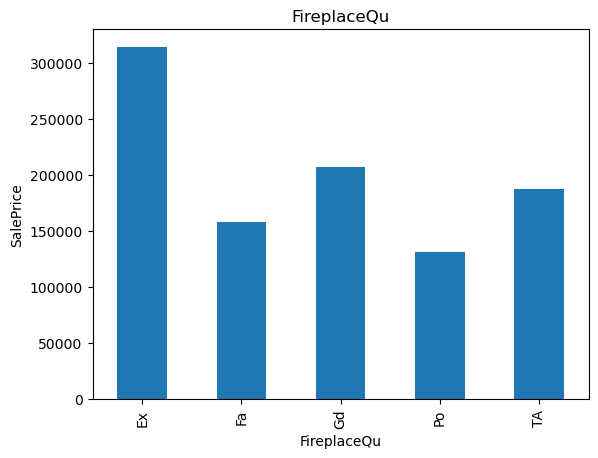

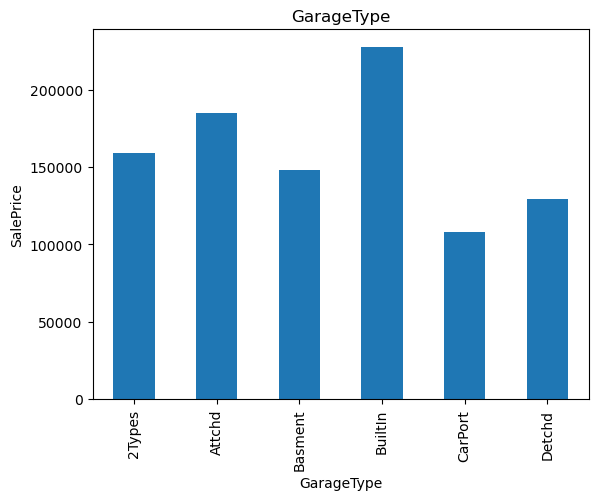

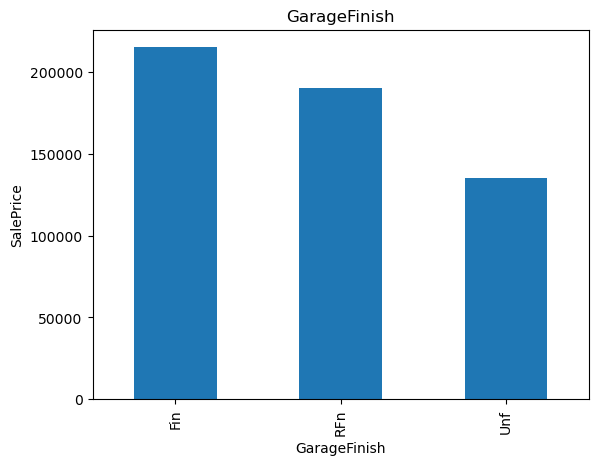

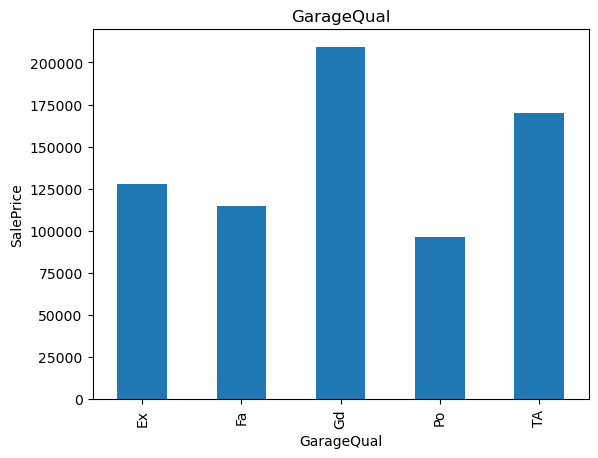

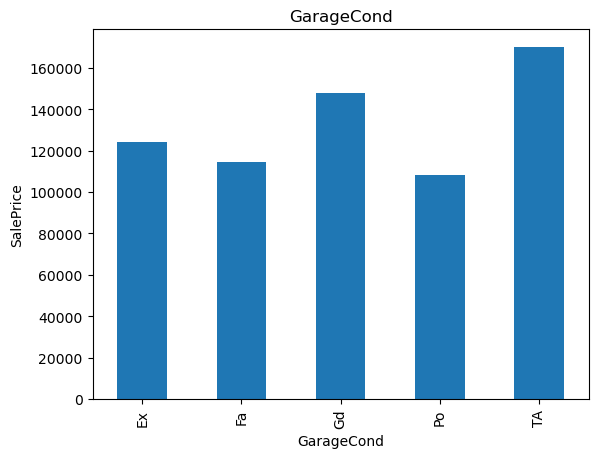

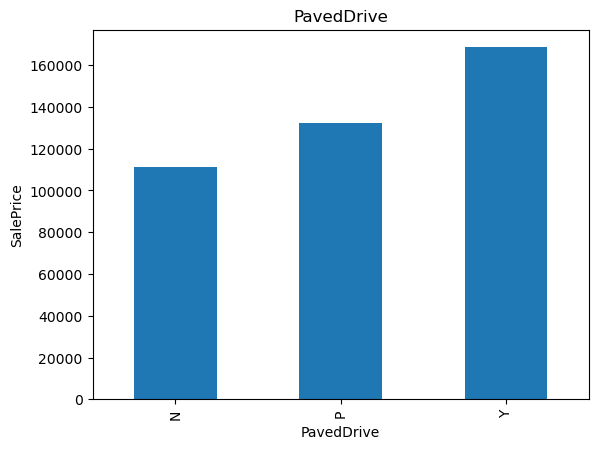

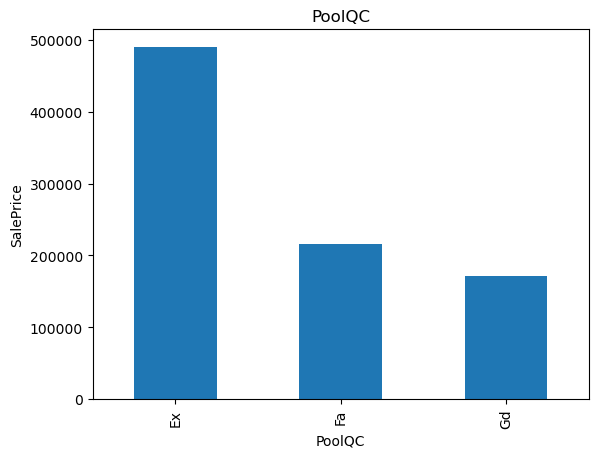

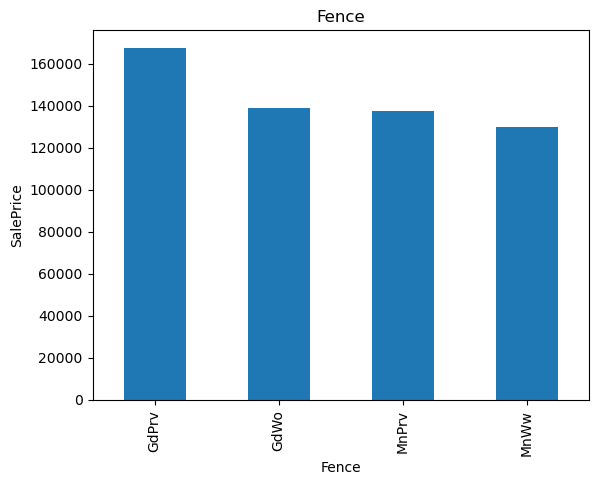

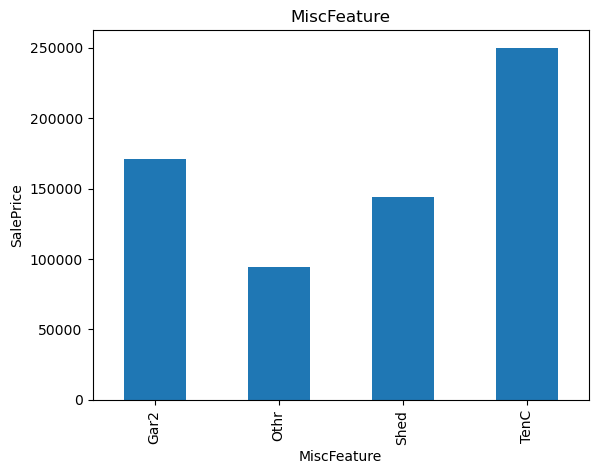

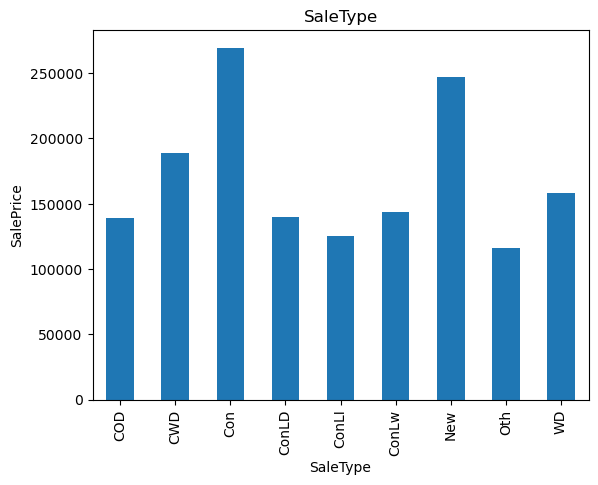

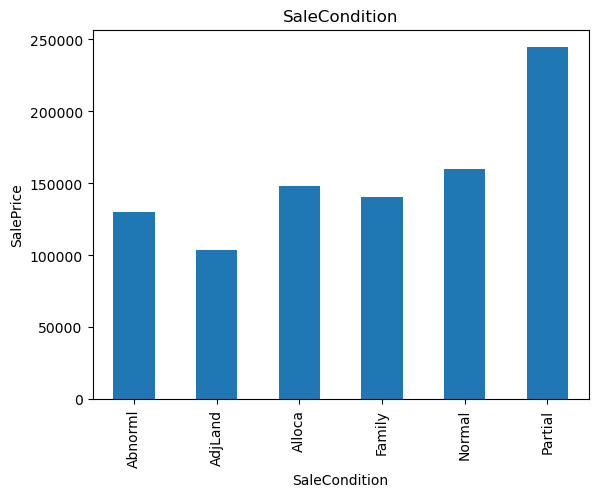

In [210]:
for feature in categorical_features:
    data=data.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# Missing Values

In [217]:
features_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes=='O']
features_nan

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [222]:
def rep_nan_values(data , features_nan):
    dataa = data.copy()
    dataa[features_nan] = dataa[features_nan].fillna('Missing_val')
    return dataa

In [224]:
data = rep_nan_values(data , features_nan)
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street        Alley  \
0        1          60       RL         65.0     8450   Pave  Missing_val   
1        2          20       RL         80.0     9600   Pave  Missing_val   
2        3          60       RL         68.0    11250   Pave  Missing_val   
3        4          70       RL         60.0     9550   Pave  Missing_val   
4        5          60       RL         84.0    14260   Pave  Missing_val   
...    ...         ...      ...          ...      ...    ...          ...   
1455  1456          60       RL         62.0     7917   Pave  Missing_val   
1456  1457          20       RL         85.0    13175   Pave  Missing_val   
1457  1458          70       RL         66.0     9042   Pave  Missing_val   
1458  1459          20       RL         68.0     9717   Pave  Missing_val   
1459  1460          20       RL         75.0     9937   Pave  Missing_val   

     LotShape LandContour Utilities  ... PoolArea       PoolQC        Fence  \
0         Reg         Lvl    AllPub  ...        0  Missing_val  Missing_val   
1         Reg         Lvl    AllPub  ...        0  Missing_val  Missing_val   
2         IR1         Lvl    AllPub  ...        0  Missing_val  Missing_val   
3         IR1         Lvl    AllPub  ...        0  Missing_val  Missing_val   
4         IR1         Lvl    AllPub  ...        0  Missing_val  Missing_val   
...       ...         ...       ...  ...      ...          ...          ...   
1455      Reg         Lvl    AllPub  ...        0  Missing_val  Missing_val   
1456      Reg         Lvl    AllPub  ...        0  Missing_val        MnPrv   
1457      Reg         Lvl    AllPub  ...        0  Missing_val        GdPrv   
1458      Reg         Lvl    AllPub  ...        0  Missing_val  Missing_val   
1459      Reg         Lvl    AllPub  ...        0  Missing_val  Missing_val   

      MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0     Missing_val       0      2   2008        WD         Normal     208500  
1     Missing_val       0      5   2007        WD         Normal     181500  
2     Missing_val       0      9   2008        WD         Normal     223500  
3     Missing_val       0      2   2006        WD        Abnorml     140000  
4     Missing_val       0     12   2008        WD         Normal     250000  
...           ...     ...    ...    ...       ...            ...        ...  
1455  Missing_val       0      8   2007        WD         Normal     175000  
1456  Missing_val       0      2   2010        WD         Normal     210000  
1457         Shed    2500      5   2010        WD         Normal     266500  
1458  Missing_val       0      4   2010        WD         Normal     142125  
1459  Missing_val       0      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [226]:
numerical_with_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes!='O']
data[numerical_with_nan]

LotFrontage  MasVnrArea  GarageYrBlt
0            65.0       196.0       2003.0
1            80.0         0.0       1976.0
2            68.0       162.0       2001.0
3            60.0         0.0       1998.0
4            84.0       350.0       2000.0
...           ...         ...          ...
1455         62.0         0.0       1999.0
1456         85.0       119.0       1978.0
1457         66.0         0.0       1941.0
1458         68.0         0.0       1950.0
1459         75.0         0.0       1965.0

[1460 rows x 3 columns]

In [227]:
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=data[feature].median()
    
    ## create a new feature to capture nan values
    data[feature+'nan']=np.where(data[feature].isnull(),1,0)
    data[feature].fillna(median_value,inplace=True)    
data[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [228]:
data = pd.get_dummies(data)

In [229]:
feature_scale=[feature for feature in data.columns if feature not in ['Id','SalePrice']]


In [230]:
feature_scale

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'LotFrontagenan',
 'MasVnrAreanan',
 'GarageYrBltnan',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'Alley_Grvl',
 'Alley_Missing_val',
 'Alley_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotC

In [232]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit_transform(data[feature_scale])

array([[0.23529412, 0.15068493, 0.0334198 , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.20205479, 0.03879502, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.1609589 , 0.04650728, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.29411765, 0.15410959, 0.03618687, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.1609589 , 0.03934189, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.18493151, 0.04037019, ..., 0.        , 1.        ,
        0.        ]])

In [235]:
dataa = pd.concat([data[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[feature_scale]), columns=feature_scale)],
                    axis=1)

In [236]:
X = data.drop(['Id' , 'SalePrice'] , axis = 1)

In [237]:
X

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0             2003       196.0         706           0  ...               0   
1             1976         0.0         978           0  ...               0   
2             2002       162.0         486           0  ...               0   
3             1970         0.0         216           0  ...               0   
4             2000       350.0         655           0  ...               0   
...            ...         ...         ...         ...  ...             ...   
1455          2000         0.0           0           0  ...               0   
1456          1988       119.0         790         163  ...               0   
1457          2006         0.0         275           0  ...               0   
1458          1996         0.0          49        1029  ...               0   
1459          1965         0.0         830         290  ...               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0                0             0            1                      0   
1                0             0            1                      0   
2                0             0            1                      0   
3                0             0            1                      1   
4                0             0            1                      0   
...            ...           ...          ...                    ...   
1455             0             0            1                      0   
1456             0             0            1                      0   
1457             0             0            1                      0   
1458             0             0            1                      0   
1459             0             0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   
1459                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        0                      0  
4                        1                      0  
...                    ...    

In [238]:
y = data['SalePrice']

In [239]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(X,y , test_size=0.2)


In [240]:
X_train

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
1201          60         80.0    10400            7            5       1998   
1068         160         42.0     3964            6            4       1973   
214           60         69.0    10900            6            7       1977   
175           20         84.0    12615            6            7       1950   
199           20         76.0     9591            8            5       2004   
...          ...          ...      ...          ...          ...        ...   
208           60         69.0    14364            7            5       1988   
562           30         63.0    13907            5            6       1940   
1160         160         24.0     2280            6            5       1978   
1124          80         69.0     9125            7            5       1992   
990           60         82.0     9452            8            5       1997   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
1201          1998         0.0           0           0  ...               0   
1068          1973         0.0         837           0  ...               0   
214           1977       153.0         378           0  ...               0   
175           2001         0.0         477           0  ...               0   
199           2005       262.0        1088           0  ...               0   
...            ...         ...         ...         ...  ...             ...   
208           1989       128.0        1065           0  ...               0   
562           1969         0.0         290           0  ...               0   
1160          1978         0.0         311           0  ...               0   
1124          1992       170.0           0           0  ...               0   
990           1998       423.0        1074           0  ...               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
1201             0             0            1                      0   
1068             0             0            1                      0   
214              0             0            1                      0   
175              0             0            1                      0   
199              0             0            1                      0   
...            ...           ...          ...                    ...   
208              0             0            1                      0   
562              0             0            1                      0   
1160             0             0            1                      0   
1124             0             0            1                      0   
990              0             0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1201                      0                     0                     0   
1068                      0                     0                     0   
214                       0                     0                     0   
175                       0                     0                     0   
199                       0                     0                     0   
...                     ...                   ...                   ...   
208                       0                     0                     0   
562                       0                     0                     0   
1160                      0                     0                     0   
1124                      0                     0                     0   
990                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
1201                     1                      0  
1068                     1                      0  
214                      1                      0  
175                      1                      0  
199                      1                      0  
...                    ...    

In [241]:
from sklearn.linear_model import LinearRegression

In [242]:
linearreg = LinearRegression()
linearreg.fit(X_train,y_train)

LinearRegression()

In [244]:
linearreg.score(X_train,y_train)

0.9521150704691813

In [247]:
y_pred = linearreg.predict(X_test)


In [248]:
y_pred

array([180462.66520951, 175725.12982026, 135505.54037337, 124613.70572732,
       248628.92450739,  91267.24213869, 196972.10707359, 168287.44868373,
       107522.0275732 , 234141.75075995, 265927.6023678 , 205954.79435108,
       116137.06102667, 223193.33875483, 188665.20136562, 430579.43869698,
       190173.69618897, 155130.35558242, 144648.60224384, 332227.89706521,
        70701.5430843 , 134594.89706051, 127216.11471996, 142211.5615541 ,
       506154.12471344, 104133.60425964,  65351.64144894, 230428.38782659,
       245092.62193837, 132454.61147759, 189225.26377214, 288568.36319572,
       172760.31435968, 308319.68468638, 203860.35144543, 159201.4419317 ,
        98904.33554588, 146966.19065058, 139084.78900155, 224117.73918372,
        25666.61587417, 260032.43119035, 209449.61209426, 310791.32465106,
       191582.5303912 , 131609.93608812, 155726.58019721, 335057.36410731,
        22768.62679882,  42639.58876705, 161064.24700034, 128779.78491458,
       377159.54695643, 1

In [250]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred , y_test)

1858437927.082944